## Исследование данных о российском кинопрокате



**Данный проект посвящён изучению информации о российском кинопрокате.**

Заказчиком исследования является Министерство культуры Российской Федерации. В ходе исследования необходимо будет изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. А также попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.

Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_movies = pd.read_csv('/datasets/mkrf_movies.csv', sep=',')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv', sep=',')

pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
display(data_movies.head())
display(data_shows.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Старт есть, данные загружены.

Сейчас у тебя во втором датафрейме числа в экспоненциальныой записи (научная нотация). 

Для более привычного отображения можно использовать такую строку: `pd.options.display.float_format = '{:,.2f}'.format`, поместив ее вначале проекта вместе с загрузкой пакетов.
</div>



<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

О, спасибо за лайфхак!

</div>

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Понял логику (показываем ошибку, исправляем дальше), но лучше такой код закомментировать. Весь код в проекте должен выполняться без ошибок и падений.
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Понял, тогда просто изменю тип ячейки))

В этом месте и дальше буду убирать всё лишнее в тип `Raw NBConver`

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Есть еще вариант убирать весь код в тройные ковычки. Питон читает их как строку и не реагирует на то, что в коде. Это такой удобный способ комментирования. `'''code here'''`
</div>


***Посмотрим, на типы данных по фреймам. Будем выявлять из-за чего ошибка***

In [4]:
data_movies.info()
print()
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
# Посмотрим на пропуски
data_movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

In [6]:
# Просмотрим на данные, которые лежат в одноимённых столбцах и на их количество
print(data_movies['puNumber'].unique(), data_shows['puNumber'].unique(), len(data_movies['puNumber'].unique()), len(data_shows['puNumber'].unique()), sep='\n')

['221048915' '111013716' '221038416' ... '124010819' '124010619'
 '124010719']
[111000113 111000115 111000116 ... 224022410 224023210 224026410]
7484
3158


In [7]:
# Проверим какие именно данные хранятся в столбце data_movies['puNumber']
int_array = []
string_array = []
i = 0
while i < len(data_movies):
    try:
        int_array.append(int(data_movies.loc[i, 'puNumber']))
    except:
        string_array.append(data_movies.loc[i, 'puNumber'])
    i += 1
        
print( string_array, int_array, sep='\n')

['нет']
[221048915, 111013716, 221038416, 221026916, 221030815, 111013816, 111007013, 221074614, 121011416, 111019114, 221031416, 111019014, 221011415, 121003106, 221008812, 111014916, 111007513, 111027914, 111003616, 111003716, 111003316, 121015405, 111007413, 111003416, 111003516, 221072614, 221012515, 111024314, 221012815, 111014116, 111019314, 111013916, 224020512, 221006016, 221011915, 121006706, 221009314, 221012015, 111007213, 111010313, 221005015, 221004616, 121019205, 121000606, 211044013, 111011313, 111006415, 111029814, 221058014, 121004205, 111005815, 221015415, 111010513, 111010813, 221004416, 111010413, 111029514, 111010213, 221072814, 111011613, 224029312, 111005515, 111006515, 111011713, 111005915, 111011113, 111011013, 221005215, 111010913, 111006015, 111011813, 111012313, 121006606, 111006715, 111012013, 111012213, 111011913, 111026014, 111012413, 126003116, 221058214, 111013113, 111012513, 111011513, 221020115, 111012613, 111012713, 111013013, 111003014, 111013613, 1

In [8]:
# Сделаем срез и узнаем где стоит "нет"
display(data_movies.query('puNumber == "нет"'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Посмотрим если еще одна подобная строка в данных
display(data_movies.query('title == "Курбан-роман. (История с жертвой)"'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**Считаю, что из-за большого числа пропусков в данной строке и невозможности заменить значение в столбце _puNumber_ данную строку можно удалить**

In [10]:
data_movies.drop(labels=1797, axis=0, inplace=True)
#data_movies.reset_index(inplace=True)

In [11]:
# Посмотрим если эта строка
display(data_movies.query('puNumber == "нет"'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


**Ранее при просмотре общей информации о данных, и подсчёте числа уникальных значений было выявлено, что число строк во фрейме больше, чем число уникальных значений столбца _puNumber_. Найдём повторяющиеся значения из этого столбца и изучим их**

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Все верно, но лучше это сделать чуть дальше в проекте (но раз уж обнаружили, да, грех пропустить).
       
</div>

<div class="alert alert-info";  style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5> 

Обычно да, я от таких простых вещей стараюсь сразу избавлятся, чтобы больше о них не думать))

</div>

In [12]:
print(len(data_movies['puNumber'].unique()), len(data_movies['puNumber']), sep='\n')

7483
7485


In [13]:
data_movies['puNumber'].value_counts()

221154310    2
221054410    2
221009915    1
124000517    1
221150510    1
            ..
221115710    1
121023911    1
121016017    1
121020511    1
221082310    1
Name: puNumber, Length: 7483, dtype: int64

In [14]:
display(data_movies.query('(puNumber == "221154310") | (puNumber == "221054410")'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,Как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия"
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5067,Анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал"
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


***Интересная ситуация сложилась. Изучив данный вопрос, получается это реальная ошибка в Рос-реестре, а значит просто пойдём дальше.***

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Я бы удалил все подозрительные значения. Так мы точно избавимся от ошибочного :)
       
</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Так, а если это и есть реальные данные? И четыре совершенно разных фильма, разве можно просто удалить? Но хотя конечно на итоговый результат это не влияет.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 А почему бы и нет? Удалять можно безболезненно обычно до 10% данных. Ну тут у нас ситуация следующая: четыре строки, в двух из них ошибки, мы не знаем, в каких. Проще снести все и знать, что ошибок нет.
</div>


In [15]:
# Удалим повторные строки (под номерами 4638 и 5067)

data_movies.drop(labels=4638, axis=0, inplace=True)
#data_movies.reset_index(inplace=True)

data_movies.drop(labels=5067, axis=0, inplace=True)
#data_movies.reset_index(inplace=True)

In [16]:
display(data_movies.query('(puNumber == "221154310") | (puNumber == "221054410")'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


**Преобразуем столбец _data_movies['puNumber']_ к целочисленному типу данных**

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Достаточно неоптимальный способ преобразования данных. Можно было через `astype()` или `pandas.to_numeric`.
    
Кстати, убрать нечисловые значения можно было бы с помощью параметра `errors=coerce`.
       
</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Чтож, попробуем тогда методом astype(), никогда не делал, но выглядит даже проще))
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Это самый частый способ. Кое-где не работает, правда.
    

</div>


In [17]:
data_movies = data_movies.astype({'puNumber': 'int64'})

**Теперь можно объединить фреймы в один**

In [18]:
print('Длина фрейма с информацией о фильмах:', len(data_movies), 'Длина фрейма с информацие о прокате:', len(data_shows))

Длина фрейма с информацией о фильмах: 7483 Длина фрейма с информацие о прокате: 3158


***Как видно, размеры фреймов разные, поэтому при объединении надо учитывть, что если мы хотим соединить два фрейма в один и ничего при этом не потерять, то действовать нужно осторожно. Для решения данной проблемы очень хорошо подойдёт метод `merge`. С ним довольно удобно объединять разные фреймы данных, он позволяет в явном виде указать во-первых по какому столбцу идёт объединение и имеет ряд управляющих соединением параметров. Так, запись `data_movies.merge(data_shows, on='puNumber')`, говорит нам о том что к фрейму `data_movies` присоединяем фрейм `data_shows`, объединение идёт по равным записям найденным в столбце `'puNumber'` в обоих фреймах. Однако, при этой конкретной записи мы получим в результате фрейм, который содержит в себе по сути только пересечение фреймов, а нам нужны все записи, именно для этого в методе `merge` есть управляющий параметр `how`, в который можно передать, относительно какого фрейма мы делаем объединение, и так как главным мы передаём `data_movies`, то передаём значение `left`, т.е. главный фрейм слева. Таким образом мы ничего не потеряем.***

In [19]:
# Снова попробуем объединить
data = data_movies.merge(data_shows, on='puNumber', how='left')

In [20]:
print('Длина фрейма после объединения:', len(data))
display(data.head())

Длина фрейма после объединения: 7483


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


**Данные успешно объеденины в один фрейм без потери информации. Теперь приступим к их подготовке для дальнейшего анализа**

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь важно в явном виде (с текстовым комментарием) проверить правильность объединения таблиц: сколько строк ожидали увидеть, сколько получили. Можно также пояснить, почему выбрали именно такой тип объединения (left).

</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Исправлено.
    
</div>

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7482
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7483 non-null   object 
 1   puNumber               7483 non-null   int64  
 2   show_start_date        7483 non-null   object 
 3   type                   7483 non-null   object 
 4   film_studio            7465 non-null   object 
 5   production_country     7481 non-null   object 
 6   director               7474 non-null   object 
 7   producer               6915 non-null   object 
 8   age_restriction        7483 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6517 non-null   object 
 14  genres                 6508 non-null   object 
 15  box_

**Преобразуем столбец "даты премьеры фильмов" _show_start_date_ в формат дата/время** 

In [22]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
display(data.head(5))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно. Единственное, милисекунды можно было не прописывать :)
    
`dataset['show_start_date'] = pd.to_datetime(dataset['show_start_date'], format='%Y-%m-%d')`
</div>

**Далее до столбца "источники финансирования" следуют данные, которые соответствуют типам _object_ и _float64_. Посмотрим на внимательнее на рейтинг.**

In [23]:
print(data['ratings'].unique(), '\n','\n','число уникальных:', len(data['ratings'].unique()))

['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' nan '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '99%' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '28%' '3.7' '1.4' '3.1' '97%' '3.5' '3.2' '2.8' '1.5' '2.1' '2.5' '9.2'
 '3.4' '1.1' '3.6' '83%' '64%' '91%' '94%' '62%' '79%' '90%' '19%' '88%'
 '1.0' '89%' '1.3' '1.9' '1.8' '1.2' '1.7' '9.0' '98%' '8.9' '9.1'] 
 
 число уникальных: 95


***Как видно с рейтингом явно проблема, будем приводит к стандарту.***

In [24]:
# Для сравнения попробуем старый способ

# Разработаем функцию, которая преобразует рейтинг к стандартному виду
def float_ratings(row):
    try:
        if(row.find('%') > -1):
            return (int(row[:2]) / 10)
        else:
            return (float(row))
    except:
        return row
data['ratings_new'] = data['ratings'].apply(float_ratings)

%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs


In [25]:
# Новое решение!!

# функция для привидения рейтинга к десятичному виду
def rating_float(rating):
    if (rating > 10):
        return (rating / 10)
    else:
        return rating

data['ratings'] = data['ratings'].str.replace('%','')
data = data.astype({'ratings':'float64'})
data['ratings'] = data['ratings'].apply(rating_float)

%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

 Ок, допустимое решение, но нужна аргументация.
    
По решению, можно было чуть быстрее, использовав реплейс, а затем разделив все значения больше 10 на 10:
    
`data['ratings'] = data['ratings'].str.replace('%','')`
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Переделал, на новый лад. Однако существенного превосходства нового метода так и не возникло. Но наверное это конечно правильней, 7.5 тыс записей возможно не так много, вот если их будет больше, тогда возможно уже и выйгрыш будет больше.
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Да, в цикле будет медленнее и по скорости, но я имел ввиду быстрее код писать :)
</div>


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7482
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7483 non-null   object             
 1   puNumber               7483 non-null   int64              
 2   show_start_date        7483 non-null   datetime64[ns, UTC]
 3   type                   7483 non-null   object             
 4   film_studio            7465 non-null   object             
 5   production_country     7481 non-null   object             
 6   director               7474 non-null   object             
 7   producer               6915 non-null   object             
 8   age_restriction        7483 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Типы данных проверены и приведены к нужным типам. Далее изучим пропуски в данных и приступим к их заполнению.**

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично
</div>

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

**Подсчитаем число пропусков в данных. Найдём сколько это будет в процентном представлении от общего числа.**

In [27]:
# Общее число пропусков
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7151
nonrefundable_support    7151
budget                   7151
financing_source         7151
ratings                   966
genres                    975
box_office               4325
ratings_new               966
dtype: int64

In [28]:
# Теперь покажем сколько процентов пропущено. Будем выводить только те данные где есть пропуски.
for row in data.columns:
    
    procent = round(data[row].isna().sum() / len(data) * 100, 2)   
    
    if(procent > 0):
        display('Процент пропущенных значений для столбца {0} равен {1}%'. format(row, procent))

'Процент пропущенных значений для столбца film_studio равен 0.24%'

'Процент пропущенных значений для столбца production_country равен 0.03%'

'Процент пропущенных значений для столбца director равен 0.12%'

'Процент пропущенных значений для столбца producer равен 7.59%'

'Процент пропущенных значений для столбца refundable_support равен 95.56%'

'Процент пропущенных значений для столбца nonrefundable_support равен 95.56%'

'Процент пропущенных значений для столбца budget равен 95.56%'

'Процент пропущенных значений для столбца financing_source равен 95.56%'

'Процент пропущенных значений для столбца ratings равен 12.91%'

'Процент пропущенных значений для столбца genres равен 13.03%'

'Процент пропущенных значений для столбца box_office равен 57.8%'

'Процент пропущенных значений для столбца ratings_new равен 12.91%'

In [29]:
# Внимательно посмотрим на столбец "источники финансирования" (financing_source)
print(data['financing_source'].unique())

[nan 'Министерство культуры' 'Фонд кино'
 'Министерство культуры, Фонд кино']


***Изучив, полученные данные, а также обратив внимание на столбец financing_source. Можно сделать следующий вывод: столбцы "объём возвратных средств", " объём невозвратных средств", "источники финансирования" и "бюджет" имеют одинаковый процент потерь, так как они все связаны с господдержкой фильмов.***

**Удивительное наблюдение, почему нет информации о бюджете фильмов. Но имея подобную информацию на руках, можем просто занулить пропущенные значения в столбцах с числовыми данными, а в столбце "источники финансирования" вместо пропусков запишем: "Иной источник"**

In [30]:
# Избавимся от пропусков
data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
#data['budget'] = data['budget'].fillna(0)

data['financing_source'] = data['financing_source'].fillna('Иной источник')

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
refundable_support, nonrefundable_support - виды господдержки. Здесь предполагается, что если у нас пропуски, то поддержку фильмы не получали. Данные брали с сайта Минкульта, предполагаем, что госфинансирование должно иметь достаточную полноту данных (госсредства требуют строгой отчетности). Можно заменить на нули.
    
А вот с бюджетом фильма другая история. Здесь действительно пропуски − пропуски. Если будем заменять их на медиану или занулять − исказим данные. Думаю, здесь лучше пока оставить пропуски, позже в проекте мы поймем, как пропуски можно корректно обработать.

</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

А какая принципиальная разница? Нулевого бюджета чисто из логики быть не может никак, если надо будет сделать срез, то можно будет просто указать больше нуля и всё, сразу сделаем срез по фильмам только с гос. поддержкой. Честно говоря не вижу в данном случае оставлять пропуски. НО закомментирую, проблем с этим нет))) По ходу проекта, так и не понял в чём смысл оставлять бюджет с пропусками, но раз надо то надо))

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

История такая. Нулевой бюджет в принципе из логики быть может. Представим ситуацию: заканчиваешь курс, приходишь работать в крупную команию, над проектом трудишься ты и еще товарищ. Ты зануляешь пропуски в бюджете, а товарищ искренне считает, что это такие нулевые бюджеты, пишет отчет ... (дальше продолжи сам). 
    
Всегда стоит минимизировать риски. Я проверяю проекты, часто вижу, как студенты зануляют, а через десять ячеек кода уже про это забывают :)       
</div>


**Далее посмотрим на рейтинг**

Пропущенные значения в рейтинге, могут говорить нам о том, что либо фильм не оценивался, либо не хватает пользовательских оценок. Исходя из этого, можно также просто занулить пропущенные значения. Но надо запомнить, _что рейтинг 0 нам говорит об остуствии рейтинга_, а не о том что он низкий!!!

In [31]:
data['ratings'] = data['ratings'].fillna(-1)

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Ок, если мы используем некоторое значение, чтобы напомнить, что там пропуски, то такое значение необходимо выбирать точно не из списка даже потенциально возможных. То есть, здесь нулем заполнять нельзя, можно было бы заполнить «-1», но вообще стоит посмотреть на количество пропусков. Если их немного, можно строки удалить. Если много − оставить как есть (тогда не придется каждый раз вспоминать, что нули - это не нули.

</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Согласен, в этом моменте долго думал как лучше сделать)) вот только почему-то не догадался, что можно просто отрицательное значение сделать и всё))

</div>

**Сборы в рублях (box_office)**

In [32]:
display(data['box_office'].sort_values(ascending=True).head(30))

1782     0.00
933      0.00
914      0.00
1126     0.00
2218     0.00
2077     0.00
237      0.00
1387     0.00
2684     0.00
3993     0.00
932      0.00
4788     0.00
596      0.00
1772     0.00
2036     0.00
2441     0.00
3594     0.00
976      0.00
1559     0.00
3826     0.00
4065     0.00
2125     0.00
66       0.00
1977     0.00
151     40.00
2273    50.00
3916    75.00
1180    80.00
351    100.00
4062   100.00
Name: box_office, dtype: float64

***Сборы в рублях также имеют очень высокий процент пропущенных значений 57.8%. Однако, надо понимать, что информация из этого столбца связана, только лишь с российским кинопрокатом. Заполнять пропуски в данном случае не будем. Но надо запомнить, что дальнешие исследования, в которых будут использоваться данные из это столбца, будут расчитываться только для российского кинопроката.***

**_________________________**

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен
</div>

**Изучим пропуски в столбцах "студия производства", "страна производства", "режисёр", "продюсер" и "жанры"** 

**Студии производства**

In [33]:
ToF = data['film_studio'].isna()
data[ToF]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_new
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Иной источник,7.30,комедия,NaN,7.30
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,0.00,0.00,NaN,Иной источник,4.00,"мультфильм,комедия",NaN,4.00
6102,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,0.00,0.00,NaN,Иной источник,-1.00,NaN,NaN,NaN
6178,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,0.00,0.00,NaN,Иной источник,-1.00,NaN,NaN,NaN
6376,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Иной источник,-1.00,NaN,NaN,NaN
6377,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Иной источник,-1.00,NaN,NaN,NaN
6396,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,0.00,0.00,NaN,Иной источник,-1.00,NaN,"41,225.00",NaN
6482,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Иной источник,6.90,"драма,криминал,детектив",NaN,6.90
6491,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Иной источник,-1.00,NaN,NaN,NaN
6494,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Иной источник,-1.00,NaN,NaN,NaN


***Произведём замену пропусков на фразу "Неизвестно"***

**Страна производства**

**Режисёр**

In [34]:
ToF = data['director'].isna()
data[ToF]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_new
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,0.00,0.00,NaN,Иной источник,-1.00,NaN,"44,350.00",NaN
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,0.00,0.00,NaN,Иной источник,-1.00,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Иной источник,-1.00,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,0.00,0.00,NaN,Иной источник,-1.00,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Иной источник,-1.00,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,0.00,0.00,NaN,Иной источник,7.90,"концерт,музыка",NaN,7.90
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,0.00,0.00,NaN,Иной источник,4.00,"мультфильм,комедия",NaN,4.00
4921,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,0.00,0.00,NaN,Иной источник,-1.00,NaN,NaN,NaN
4940,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,0.00,0.00,NaN,Иной источник,6.70,"концерт,музыка",NaN,6.70


***Как видно, пропуски в этих колонках говорят, что это всё записи концертов, потому просто удалим их.***

Хотел удалить пропуски методом `dropna()`, но по каким-то причинам (так и не понял почему) у меня не получилось это сделать. Из-за этого сделал дурацкий костыль ввиде циклов.

In [35]:
# Удалим строки с пропусками в названиях студий
ToF = data['film_studio'].isna()
for idx in data[ToF].index:
    data.drop(labels=idx, axis=0, inplace=True)

# Удалим строки с пропусками в именах режиссёров
ToF = data['director'].isna()
for idx in data[ToF].index:
    data.drop(labels=idx, axis=0, inplace=True)    
    
# Удалим строки с пропусками в названиях стран
ToF = data['production_country'].isna()
for idx in data[ToF].index:
    data.drop(labels=idx, axis=0, inplace=True)

In [36]:
# Проверка
ToF = data['director'].isna()
display(data[ToF])

ToF = data['film_studio'].isna()
display(data[ToF])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_new


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_new


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Хм. Начнем с того, что это все даже не фильмы. Может, удалить?
       
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Я считал, что это всё тоже важно потому и оставил, ну раз стоит удалить так удалим)))

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично :) 
</div>


**Пропуски в столбцах "продюсер" и "жанры" имеет схожий характер с пропусками рассмотренными ранее. Данные пропуски необходимо все заполнять в ручную, загуглив про каждый фильм отдельно. Но, так как пропущенно в совокупности порядка 1.5 тыс. записей, то заполним данные пропуски фразой "Неизвестно".**

In [37]:
data['producer'] = data['producer'].fillna('неизвестно')
data['genres'] = data['genres'].fillna('неизвестно')

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Число пропусков небольшое, как увидели, там строки чаще вообще не про фильмы. Я бы удалил.
       
</div>


In [38]:
# Общее число пропусков
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                   7124
financing_source            0
ratings                     0
genres                      0
box_office               4301
ratings_new               947
dtype: int64

**Все возможные пропуски в данных заполнены, данные подготовлены для дальнейшей обработки.**

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Большинство решений верные или допустимые. Как написал выше, не соглашусь с занулением рейтингов и бюджета.
       
</div>


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**Для поиска дубликатов создадим ряд необходимых функций**

In [39]:
# Посмотрим как выглядят данные в фрейме
for row in data.loc[0]:
    print(row)
print()    
for row in data.loc[35]:
    print(row) 

Открытый простор
221048915
2015-11-27 12:00:00+00:00
Художественный
Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз
США
Кевин Костнер
Дэвид Валдес, Кевин Костнер, Джейк Эбертс
«18+» - запрещено для детей
0.0
0.0
nan
Иной источник
7.2
боевик,драма,мелодрама
nan
7.2

Миссис Хендерсон представляет
121006706
2015-12-30 12:00:00+00:00
Художественный
БиБиСи Филмз, Фьючер Филмз, Хейман-Хоскинс Продакшнз, Микро Фьюжн, Патэ Пикчерз Интернэшнл
Великобритания
Стивен Фрирз
Норма Хейман, Боб Хоскинс
«16+» - для детей старше 16 лет
0.0
0.0
nan
Иной источник
7.0
драма,комедия,военный
nan
7.0


***Далее следует блок экспериментов*** 

Тестирование возможностей: как можно делать, а как нельзя

**=============================================================================================================================**

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Было бы неплохо, если бы здесь были пояснения, что и с какой целью делаем.
       
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

В данном блоке нет пояснений, потому что здесь проделывал просто эксперименты, смотрел как можно делать, а как нельзя. Вообще конечно можно и удалить всё. Но оставил больше для себя, так сказать на память)).
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Ок, без претензий. Кстати, написание документации к функциям - отдельный вид искусства. И, кстати, пояснения к работе функций − тот редкий случай, когда комментарии правильнее писать в коде, а не в текстовых ячейках.
</div>


**===========================================================================================================================**

**Создадим функцию, которая будет возвращать массив с уникальными наименованиями**

In [40]:
def unique_name_func(column, separator):
    uniq_name_arr = [] # исходный массив
    uniq_name_set = [] # массив с уникальными значениями
    
    # соберём массив, содержащий все наименования 
    for ind in data.index:
        for row in data.loc[ind, column].split(separator):
            uniq_name_arr.append(row)
    
    # соберём массив содержащий только уникальные наименования (без пробелов) и длиной больше пяти символов,    
        # чтобы убрать возможные ошибки, аналогично функции del_short_string 
        # (которая написана далее и работала со cтарым алгоритмом)
    for row in set(uniq_name_arr):
        if(len(row) > 5):
            uniq_name_set.append(row.strip())
            
    return uniq_name_set

**Создадим ряд функций, которые помогут найти неявные дубликаты в данных.**

In [41]:
# Добавим функцию которая будет сравнивать длины двух строк и возвращать сначала длинную, потом короткую строки
def longest_string(string_1, string_2):
    if(len(string_1) > len(string_2)):
        return string_1, string_2
    else:
        return string_2, string_1

In [42]:
# НОВАЯ ВЕРСИЯ!!!!!!!!!

# Функция сравнивающая похожесть строк
"""
Пояснения по данной фунции.
Данная функция выполняет посимвольное сравнение двух строк.
Результатом работы фунции будет значение от 0 до заданного порога treshold. 
Значения на выходе будем интерпретировать так: от 0 до treshold - 1 будем считать строки похожими, 
если получим значение порога равного treshold, то строки точно разные.
Порогом в данном случае будем считать количество возможных ошибок при заполнении таблиц.
"""
def similar_strings(string_1, string_2, treshold):
    
    count_begin = 0 # счётчик числа различий между словами (который идёт с начала строк)
    count_end = 0 # счётчик числа различий между словами (который идёт с конца строк)
    
    # здесь сразу проверяем длину строк (строки разной длины явно не равны)
    if(abs(len(string_1) - len(string_2)) >= treshold): 
        return treshold    
    
    # применим ранее созданную фунцию
    long_string, short_string = longest_string(string_1, string_2)
    
    # добавим проверку на сравнение длин если они равны, то идём по одному пути, иначе - немного по другому
    if(len(long_string) == len(short_string)):

# первый путь -----------------------------------------------------------------------------------------
        # в этом цикле производим по символьное сравнение, если выявлены различия, то суммируем счётчик
        i = 0
        j = len(long_string) - 1
        while i < len(short_string):
            if (long_string[i] != short_string[i]):
                count_begin += 1
            if (long_string[j] != short_string[j]):
                count_end += 1

            # эта проверка нужна для того, чтобы избежать лишних вычислений, 
            # если различий больше допустимого значения, то прекращаем
            if((count_begin >= treshold) & (count_end >= treshold)):
                break
            
            i += 1
            j -= 1

# второй путь -----------------------------------------------------------------------------------------
    else:
               # в этом цикле производим по символьное сравнение, если выявлены различия, то суммируем счётчик
        i = 0
        j = len(long_string) - 1
        while i < len(short_string):
            if (long_string[i] != short_string[i]):
                count_begin += 1
            if (long_string[j] != short_string[j-1]):
                count_end += 1

            # эта проверка нужна для того, чтобы избежать лишних вычислений, 
            # если различий больше допустимого значения, то прекращаем
            if((count_begin >= treshold) & (count_end >= treshold)):
                break
            
            i += 1
            j -= 1
               
    return min(count_begin, count_end)

***Далее идут две функции, их надо немного переработать. Лучше попробовать собирать словарь, где ключами будут слова на которые мы будем заменять, а значениями - массив похожих строк.***

In [43]:
# НОВАЯ ВЕРСИЯ!!!!!!!!!!!!

# Обобщённая функция, которая будет применяться сразу ко всему массиву
"""
Пояснения по данной функции.
Результатом работы данной функции будет двумерный массив, содержащий похожие строки.
Это будет необходимо для того, чтобы проверить нет ли в данных неявных дубликатов. 
Как показывает практика, проблема может быть в регистре или одной букве, будем их искать.
"""

def group_similar_strings(array, treshold):
    
    similarity = {} # в данный словарь будем помещать похожие строки
    
    for row in array[:-1]:
        
        # добавим try/except для учёта возможности удаления строк из массива во втором цикле
        # если строка удалена, то просто продолжаем цикл со следующей строки row
        try:        
            # запускаем второй цикл, с элементами которого и будем сравнивать похожесть строк
            for elem in array[array.index(row)+1:]:
                if(similar_strings(row, elem, treshold) < treshold):

                    # добавляем значения в словарь, учитывая возможность остутствия ключа в словаре
                    try:
                        similarity[row].append(elem)
                    except:
                        similarity[row] = [elem]

                    array.pop(array.index(elem)) # удаляем строку из исходного массива, чтобы она больше нам не попадалась
        except:
            continue

           
    return similarity

In [44]:
# функция для замены подстрок
def replace_string(string, value_pair):   
        return string.replace(value_pair[0], value_pair[1])

In [45]:
# Функция для удаления лишних пробелов, которые могут быть как в начале, так и в конце названий
def del_spacing_string(string):
    return string.strip()

In [46]:
# Функция для удаления всех пробелов в строке
def del_spacing_all(string):
    return string.replace(' ', '')

In [47]:
# Функция для разделения строк по заданному разделителю для отдельных задач
def split_string_in_array (array, separator):
    
    result_array = []
    
    for row in array:
        result_array.append(row.split(separator))
    
    return result_array

***Как видно из проведённого эксперимента, даже если поставить различие всего в один символ, получилось огромное число пар. Не будем портить исходный столбец, для удаления дубликатов создадим во фрейме новый столбец содержащий названия в нижним регистре. Далее будем действовать следующим образом: будем считать, что все выявленные пары - это реальные дубликаты, а следовательно будем искать во фрейме все значения равные первому значению из пары и затем его заменять на второе. А ввиду того, что есть пары похожие еще и между собой проведём этот алгоритм действий несколько раз.***

**Итак, уберём дубликаты из названий студий**

In [48]:
# Создадим столбец с нижним регистром
data['film_studio_lower'] = data['film_studio'].str.lower()

# Удалим лишние возможные пробелы в начале и в конце строк
data['film_studio_lower'] = data['film_studio_lower'].apply(del_spacing_string)

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Просто напомню, как еще можно привести строки к нижнему регистру.
`df.columns = df.columns.str.lower()`

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Хм... Понял, переделал. 
    
</div>

In [49]:
# Далее запустим созданный алгоритм для устранения неявных дубликатов
# Так как, за раз устранить множество дубликатов не удаётся, то повторим алгоритм несколько раз

i = 0
while i < 5:
    # Применим фунцию выделяющую уникальные нaименования
    group_uniq_studio = unique_name_func('film_studio_lower', ', ')
    # Применим фунцию, которая образует пары похожих строк
    group_uniq_studio = group_similar_strings(group_uniq_studio, 2)
    
    print(len(group_uniq_studio))
    
    # Произведём замену наименований
    for ind in data.index:
         for key in group_uniq_studio.keys():
            for value in group_uniq_studio[key]:
                if(data.loc[ind, 'film_studio_lower'].find(value) > -1):
                        data.loc[ind, 'film_studio_lower'] = data.loc[ind, 'film_studio_lower'].replace(value, key)
                                        
    i += 1

873
109
48
23
17


***Ввиду того, что созданный алгорим поиска похожих строк крайне не устойчив, и требует множества повторения и даже может вообще не сойтись, что грустно. Понятно что в данном случае лучше бы подошли методы основанные на вероятностном подходе или еще чего подобное, но в данном случае это был бы уже другой проект. Потому, дубликаты из столбца студия-производитель (film_studio) будем считать устранёнными. Приступим к обработке других столбцов.***

**==========================================================================================================**

**Далее следуют эксперименты с работой конечного алгоритма, а также с количеством необходимых повторений**

Перевёл в тип ячеек Raw NBconvert, чтобы убрать лишние вычисления

**==========================================================================================================**

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Время исполнения ячейки можно измерить встроенной командой `%time`. https://stackoverflow.com/questions/49403536/what-does-time-mean-in-python-3 
       
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

О спасибо, я вот всё пытался найти каким же простым способом это можно сделать. B инете только какие-то мудрённые методы с управлением временем и т.п.))

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Дальше в курсе будет много лайфхаков, ближе к DS. Я сам на полгода отлучался от кодинга, сейчас удивляюсь, сколько всего автоматизировано, что раньше руками писалось (ну тоже больше через компиляцию, но теперь просто строка кода и все). Stay tuned!
    
</div>


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Падающий код нужно обязательно удалить или поправить.
    
По коду выше − оценил. Действительно, выделяет похожие фразы с минимальными различиями. 
    
Вот примеры реализованных функций похожего назначения : https://stackoverflow.com/questions/31642940/finding-if-two-strings-are-almost-similar 
    
Инструкция на русском: https://antonz.ru/difflib-ratio/ 

</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Ой, а можно просто изменить тип ячейки?)) это блок опять же эксперементальный здесь я отрабатывал методику) Я тогда лучше типы ячеек сменю на _Raw NBConvert_. И спасибо за реализованные примеры по похожим строкам) понятно, что можно найти существующие хорошие решения, но проверить списан ли код, проблем нет. Да и вообще хотелось по пробовать, что-то своё придумать))) хоть пока и не особо устойчивое.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Да, без вопросов. Напомню, лучше не тип ячейки менять, а все взять в тройные ковычки.
</div>


**==========================================================================================================**

**На этом месте эксперименты закончились)). Оставил их для себя, есть ряд интересных идей, которые могут понадобиться.**

**==========================================================================================================**

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Если есть время и желание реализовывать на python разные штуки, которые, теоретически, близки к DS и аналитике, то вот есть такой бесплатный курс: https://stepik.org/course/3356/promo 
    
Там есть задачи типа посчитать площадь додекаэдра, но бывают и приближенные к ручному коду градиентного спуска. Весьма увлекательно. Кстати, дисциплинирут в плане дебагинга.
       
</div>




<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Спасибо!!

</div>

**Посмотрим на типы фильмов.**

In [50]:
print(data['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']


In [51]:
# Тип художественный
print(data['type'].unique()[5] == data['type'].unique()[0])
# Тип анимационный
print(data['type'].unique()[6] == data['type'].unique()[1])

False
False


***Приведём выявленные различия в типах "Художественный" и "Анимационный" к одному виду.***

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Ага, здесь также чере реплейс все работает.
       
</div>

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
вероятно, нужно раскомментировать функцию, чтобы код делал, что должен. Проект должен корректно отрабатывать, если мы запускаем все с первой ячейки и до последней.

</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Наверное я не очень корректно сделал)) В начале, я действительно использовал функцию через `replace()`, но потом узнал про метод `.strip()`, который позволяет удалять вообще все пробелы как в начале так и в конце, и переделал. Но так как новая функция нужна не только в этом месте, то перенёс ее выше, где объявлено сразу множество функций. Хотел сделать нечто наподобие своей маленькой библиотеки с функциями. Однако, согласен, получилось не удобно и не понятно куда смотреть и где искать))). Библиотеку вообще конечно лучше в отдельный файл выводить, и потом импортом вызывать. Но перенести новую функцию сюда тоже будет не корректно. Я ее в ячейку ниже положу, чтобы понимать о какой функции идёт речь))

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Ок.
</div>


In [52]:
# Применим ранее созданную функцию "del_spacing_string"
data['type'] = data['type'].apply(del_spacing_string)

In [53]:
print(data['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


**Изучим столбец "страна производства"**

In [54]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [55]:
# Создадим фунцкию для разделения строк по заданным символам
def split_string_in_array (array, separator):
    
    result_array = []
    
    for row in array:
        result_array.append(row.split(separator))
    
    return result_array

In [56]:
# соберём все названия стран на всякий случай
country = unique_name_func('production_country', ',')

# подготовим данные для разделения
for row in country:
    row = row.replace('-', ' - ')
    row = row.replace(',', ' - ')
    row = row.replace(', ', ' - ')
    row = row.replace('   ', '')
            
country = split_string_in_array(country, '-')

In [57]:
country_arr = []
uniq_country = []
for row in country:
    for elem in row:
        country_arr.append(elem.strip())
        
for row in set(country_arr):
    uniq_country.append(row)

In [58]:
print(uniq_country)

['Ланка', '', 'Республика Кипр', 'Уганда', 'Кения', 'Германя', 'Новая Зеландия', 'Босния', 'Япония', 'Перу', 'Финляндия', 'Гонконг', 'Дания', 'Ю.Корея', 'Чехословакия', 'Хорватия', 'Ливан', 'Герцеговина', 'Таджикистан', 'СССР', 'Непал', 'Исландия', 'Нидерланды', 'Канада', 'Румыния', 'Словения', 'Бельгия', 'Аргентина', 'Шри', 'Турция', 'Иран', 'Швеция', 'Англия', 'Люксембург', 'Южная Корея', 'Уругвай', 'Белоруссия', 'Черногория', 'Португалия', 'Куба', 'Тайвань', 'Австралия', 'Мальта', 'Польша', 'Босния и Герцеговина', 'Индия', 'Эквадор', 'Мексика', 'Колумбия', 'Княжество Андорра', 'Республика Армения', 'ЮАР', 'Греция', 'Парагвай', 'Таиланд', 'Бахрейн', 'Италия', 'Республика Узбекистан', 'Республика Казахстан', 'Афганистан', 'Сингапур', 'Венгрия', 'Чили', 'Изриль', 'Бразилия', 'Словакия', 'ФРГ', 'Венесуэла', 'Литва', 'Болгария', 'Порртугалия', 'Азербайджан', 'Сенегал', 'Рико', 'Багамские острова', 'Чешская Республика', 'Великобритания', 'Киргизия', 'КНР', 'Израиль', 'Каймановы острова', 

In [59]:
# составим список изменений которые надо сделать сразу
spisok = [
    ["Фрация", "Франция"],
    ["Германя", "Германия"],
    ["ПНР", "Польша"],
    ["Бенльгия", "Бельгия"],
    ["ФРГ", "Германия"],
    ["СЩА", "США"],
    ["К;анада", "Канада"],
    ["Корея", "Республика Корея"],
    ["Изриль", "Израиль"],
    ["Белоруссия", "Республика Беларусь"],
    ["Порртугалия", "Португалия"],
    ["Южная Корея", "Республика Корея"],
    ["2019", ""]
]

In [60]:
# Устраним неявные дубликаты
for value_pair in spisok:
    for ind in data.index:
        if(data.loc[ind, 'production_country'].find(value_pair[0]) > -1):
            data.loc[ind, 'production_country'] = replace_string(data.loc[ind, 'production_country'], value_pair)
            
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично
</div>

***Неявные дубликаты в названии стран выявлены и устранены***

**Посмотрим на столбцы "режиссёр" и "продюссер".**

In [61]:
# Разберёмся с режессёрами
for row in data['director'].unique():
    print(row)

Кевин Костнер
Е.Матвеев
Тимур Бекмамбетов
В.Абдрашитов
В.Меньшов
Джон Туртурро
Эрик Беснард
В.Титов
Пол Грингросс
М.Туманишвили
Клинт Иствуд
Фернанду Мейрелльеш
Майк Фиггис
А.Салтыков
Г.Данелия
А.Смирнов
Ю.Чулюкин
В.Краснопольский, В.Усков
М.Чиаурели
Лассе Халлстрем
Л.Гайдай
В.Чеботарев
В.Азаров
Боривой Земан
Эндрю Никкол
Г.Мыльников
Джонатан Кинг
И.Бабич
Даниэль Робишо
Грегори Хоблит
Крис Нунан
Стивен Фрирз
Йэн Софтли
Найл Джонсон
Р.Быков
Роб Райнер
Бен Янгер
Роб Маршалл
Е.Ташков
Н.Михалков
Ю.Карасик
А.Тарковский
Джон Франкенхаймер
Оливье Маршал
С.Соловьев
Иоахим Реннинг, Эспен Сандберг
Ролан Быков
Семен Туманов
Питер Сигал
М.Ромм
Г.Полока
Ю.Райзман
Дрю Дэйуолт, Дэвид Шнейдер
С.Самсонов
Айрон Блейз, Роберт Уокер
К.Шахназаров
И.Гостев
Т.Лукашевич
В.Павлович
Эмиль Лотяну
Тиль Швайгер
А.Птушко
Г.Натансон
И.Пырьев, М.Ульянов, К.Лавров
Джеймс Айвори
И.Пырьев
К.Юдин, Б.Барнет
С.Бондарчук
В.Георгиев
В.Басов
А.Сурикова
Майк Слии
Томми О'Хавер
А.Эфрос
М.Микаэлян
А.Серый
Дин Хэмилтон
Г.Панфилов

In [62]:
# Уберём дубликаты в именах режиссёров по разработанному алгоритму
i = 0
while i < 5:
    # Применим фунцию выделяющую уникальные нaименования
    group_uniq_director = unique_name_func('director', ', ')
    # Применим фунцию, которая образует пары похожих строк
    group_uniq_director = group_similar_strings(group_uniq_director, 2)
    
    # Произведём замену наименований
    for ind in data.index:
         for key in group_uniq_director.keys():
            for value in group_uniq_director[key]:
                if(data.loc[ind, 'director'].find(value) > -1):
                        data.loc[ind, 'director'] = data.loc[ind, 'director'].replace(value, key)
    
    print("итерация:", i+1, 'число групп:', len(group_uniq_director))
        
    i += 1
    
%time

итерация: 1 число групп: 376
итерация: 2 число групп: 29
итерация: 3 число групп: 18
итерация: 4 число групп: 18
итерация: 5 число групп: 18
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


In [63]:
# Разберёмся с продюсерами
for row in data['producer'].unique():
    print(row)

Дэвид Валдес, Кевин Костнер, Джейк Эбертс
неизвестно
Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
Джон Пенотти, Джон Туртурро
Патрис Леду
Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг
Клинт Иствуд, Том Розенберг, Альберт С.Рудди, Пол Хаггис
Саймон Чэннинг Уильямс
Этчи Стро, Анни Стюарт, Майк Фиггис
Лесли Холлеран, Алан Лэдд мл., Келлиан Лэдд, Харви Вайнстайн
Норман Голуайтли, Энди Грош, Николас Кейдж, Эндрю Никкол, Крис Робертс, Филипп Русле
Филиппа Кемпбелл
Луис Дюкью
Чарльз Уэйнсток
Дэвид Киршнер, Майк Медэвой, Арнольд Мессер, Корей Сэйнья, Дэвид Твайтс
Норма Хейман, Боб Хоскинс
Лоуренс Гордон, Роберт Коулсберри, Ллойд Левин
Мэтью Пэйн, Джулия Пэло
Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Райнер, Эли Самаха
Дженнифер Тодд, Сюзанн Тодд, Брэдли Дженкел, Энтони Катагас
Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон Де Люка, Гэри Барбер, Роджер Бирнбаум
Франк Шоро, Сирил Кольбьё-Жюстен, Жан-Баптист Дюпон
Люк Бессон, Ариель Зейтун
Бини Барнс, Джозеф Дрэйк, Джон Линсон
Джон Балдеччи, 

In [64]:
# Уберём дубликаты в именах продюссеров по разработанному алгоритму
i = 0
while i < 5:
    # Применим фунцию выделяющую уникальные нaименования
    group_uniq_producer = unique_name_func('producer', ', ')
    # Применим фунцию, которая образует пары похожих строк
    group_uniq_producer = group_similar_strings(group_uniq_producer, 2)
    
    # Произведём замену наименований
    for ind in data.index:
         for key in group_uniq_producer.keys():
            for value in group_uniq_producer[key]:
                if(data.loc[ind, 'producer'].find(value) > -1):
                        data.loc[ind, 'producer'] = data.loc[ind, 'producer'].replace(value, key)
    
    print("итерация:", i+1, 'число групп:', len(group_uniq_producer))
        
    i += 1

итерация: 1 число групп: 651
итерация: 2 число групп: 96
итерация: 3 число групп: 75
итерация: 4 число групп: 68
итерация: 5 число групп: 67


***Также из-за слабой устойчивости алгоритма будем считать, что неявные дубликаты в именах Рижессёров и Продюсерах устранены.***

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Формулировка заставит заказчика задуматься :) Но вообще, скажем честно, играться с продюссерами здесь не грех, мы их дальше в исследовательской части никак не трогаем (обычно).
       
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

В целом согласен)) Думаю, если разработать более устойчивую функцию для поиска похожих строк, то уже можно будет более обоснованно корректировать имена).

</div>

**Далее изучим возрастной ценз.**

In [65]:
print(data['age_restriction'].unique())

['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории']


***C ограничениями по возрасту всё в порядке едим дальше)***

**Теперь посмотрим на жанры.**

In [66]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'неизвестно', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

In [67]:
# Посмотрим массив уникальных жанров без обработки
genres = unique_name_func('genres', ',')
print(genres)

['фантастика', 'реальное ТВ', 'мелодрама', 'фэнтези', 'военный', 'вестерн', 'документальный', 'приключения', 'для взрослых', 'детский', 'история', 'криминал', 'новости', 'триллер', 'семейный', 'мультфильм', 'боевик', 'неизвестно', 'биография', 'короткометражка', 'детектив', 'музыка', 'концерт', 'фильм-нуар', 'комедия', 'мюзикл']


***В столбце с жанрами тоже проблем не выявлено.***

In [68]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_new,film_studio_lower
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,NaN,Иной источник,7.20,"боевик,драма,мелодрама",NaN,7.20,"тачстоун пикчерз, кобальт пикчерз, бикон пикче..."
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Матвеев,неизвестно,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Иной источник,6.60,"драма,военный",NaN,6.60,"киностудия ""мосфильм"""
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Иной источник,6.80,"фантастика,боевик,триллер",NaN,6.80,"юниверсал пикчерзсс, кикстарт продакшнз, марк ..."
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Иной источник,6.80,"фантастика,боевик,триллер",NaN,6.80,"юниверсал пикчерзсс, кикстарт продакшнз, марк ..."
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Иной источник,6.80,"фантастика,боевик,триллер",NaN,6.80,"юниверсал пикчерзсс, кикстарт продакшнз, марк ..."


**Итак, по результатам обработки дубликатов (как явных, так и не явных), можно сделать следующий вывод, что все дубликаты выявлены, обработаны и устранены. Можно приступать, к дальнейшей подготовке данных к анализу.**

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

**Как было выявлено на этапе обработки дубликатов, почти во всех категориальных столбцах (кроме возрастного ценза и жанров) присутствует большое число неявных дубликатов. Также, стоит отметить, что одна из главных проблем при обработки подобных значений является, то что в одной ячейке могут быть перечислены сразу несколько значений, которые потенциально надо как-то обрабатывать. Наиболее сложным для обработки является "страна производитель", так как в нём от строки к строке используются множество различных разделителей, которые усложняют обработку.**

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

**Как было отмечено на этапе анализа пропусков, в предложенных данных присутствует одна серьезная проблема, которая присутствует в столбцах "бюджет", "объём возвратных средств", "объём невозвратных средств" и "источник финансирования" (_budget, refundable_support, nonrefundable_support и financing_source_). Данные в этих столбцах содержат информацию только о фильмах, которые создавались при поддержке государственного бюджета (РФ). Исходя из этого, при дальнейшем исследовании "бюджетов" фильмов, мы будем изучать только узкий круг фильмов.**

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [69]:
# Новый способ
data['year_production'] = data['show_start_date'].dt.year

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь логичнее и гораздо быстрее по скорости исполнения было бы все применить к строке, а не через цикл.
       
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Я могу ошибаться, но метод `apply` это ведь не цикл, а вроде векторный метод (если не путаю конечно). Но в любом случае нашёл еще способы как можно извлечь из даты нужные параметры даже без лишних функций))).
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Я уже не помню, как было. Apply - то да, но если его засунуть в цикл, то как бы векторно-матричное чудо пропадет.
</div>


In [70]:
# Создадим функцию, которая будет выделять первое значение из строки (либо главного режиссёра, либо главный жанр)
def chief_director_and_main_genre_func (row):
    result = row.split(',')
    return result[0]

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Вторая функция выглядит универсальнее. Кстати, ее можно применять и к жанру, и к режиссеру.
       
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Cогласен, просто когда делал, то уже порядком устал от этих "сплитов" и делал сразу чётко как в данных, если стоит только запятая, то делим по запятой, если запятая с пробелом, то это уже другой разговор))
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Ну тут не важно. Главное, доползаем до запятой и рубим, а затем берем первую часть. Что там после запятой − нас вообще не интересует.
</div>


In [71]:
# Применим созданные функции
data['chief_director'] = data['director'].apply(chief_director_and_main_genre_func)
data['main_genre'] = data['genres'].apply(chief_director_and_main_genre_func)

In [72]:
# Посмотрим на результат
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_new,film_studio_lower,year_production,chief_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,NaN,Иной источник,7.20,"боевик,драма,мелодрама",NaN,7.20,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Матвеев,неизвестно,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Иной источник,6.60,"драма,военный",NaN,6.60,"киностудия ""мосфильм""",2016,И.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Иной источник,6.80,"фантастика,боевик,триллер",NaN,6.80,"юниверсал пикчерзсс, кикстарт продакшнз, марк ...",2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Иной источник,6.80,"фантастика,боевик,триллер",NaN,6.80,"юниверсал пикчерзсс, кикстарт продакшнз, марк ...",2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Иной источник,6.80,"фантастика,боевик,триллер",NaN,6.80,"юниверсал пикчерзсс, кикстарт продакшнз, марк ...",2015,Тимур Бекмамбетов,фантастика


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь отлично. Все проверили, все работает.
    
</div>




- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [73]:
# Создадим столбец с информацией о доли гос. поддержки относительно всего бюджета фильма, 
# для этого создадим функцию и применим ее
def ratio_func(row):
    try:
        return (((row['refundable_support'] + row['nonrefundable_support']) / row['budget']) * 100)
    except:
        return 0

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Ага, бюджет зануляли. Вроде бы с пропусками код бы не падал? 
    
Отлично, что сделали через try-except
</div>




<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Кстати, здесь же можно не проходить мимо ошибок, а посмотреть, что это за строки, где господдержка есть, а бюджет нулевой? И сразу понять, что делать с такими аномалиями. Вроде бы их там 17 штук.

</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Ну всё-равно непонятно, почему не стоит занулять)) НО пропуски оставил)) 
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Кажется, в питоне можно делить на ноль? Я как-то об этот момент визуально споткнулся, обычно не рискую :)
</div>


In [74]:
data['support_ratio'] = data.apply(ratio_func, axis=1)

In [75]:
data.sample(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_new,film_studio_lower,year_production,chief_director,main_genre,support_ratio
6755,Вокс Люкс,121003419,2019-03-01 12:00:00+00:00,Художественный,"Киллер Филмз, Эндрю Лорен Продакшн, Болд Филмз",США,Брэйди Корбет,"Д.Дж.Гугенхейм, Дэвид Тиштвак, Мишель Литвак, ...",«18+» - запрещено для детей,0.00,0.00,NaN,Иной источник,5.90,"драма,музыка","4,929,934.50",5.90,"киллер филмз, эндрю лорен продакшнз, болд филмз",2019,Брэйди Корбет,драма,NaN
1532,БИРМИНГЕМСКИЙ ОРНАМЕНТ. Часть 2,111001614,2014-02-06 12:00:00+00:00,Художественный,"ОАО ""Московский информационно-технический центр""",Россия,А.Сильвестров,"А.Сильвестров, Г.Алейников, Л.Попова",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Иной источник,-1.00,неизвестно,NaN,NaN,"оао ""московский информационно-технический центр""",2014,А.Сильвестров,неизвестно,NaN
2343,По собственному желанию.,111019714,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Гаврилов,неизвестно,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Иной источник,7.90,"драма,мелодрама,комедия",NaN,7.90,"киностудия ""мосфильм""",2014,Э.Гаврилов,драма,NaN
5143,"Возвращение в ""А""",111003011,2011-04-14 12:00:00+00:00,Художественный,"АО ""Казахфильм"" им.Ш.Айманова, ТОО РПО НПЦ ""Ба...",Россия-Казахстан,А.Михалков-Кончаловский,"ООО ""ПС ТиВиСи"" Киностудия""",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Иной источник,6.50,"драма,военный","50,200.00",6.50,"ао ""казахфильм"" им.ш.айманова, тоо рпо нпц ""ба...",2011,А.Михалков-Кончаловский,драма,NaN
5020,"Анимационный фильм ""Смешарики. Начало""",114000811,2011-10-12 12:00:00+00:00,Анимационный,"ООО ""Смешарики""",Россия,О.Чернова,Л.Попова,«0+» - для любой зрительской аудитории,0.00,0.00,NaN,Иной источник,-1.00,неизвестно,NaN,NaN,"ооо ""смешарики""",2011,О.Чернова,неизвестно,NaN
3399,До встречи с тобой,121019116,2016-06-27 12:00:00+00:00,Художественный,"Метро Голдвин Майер, Нью Лайн Синема, Уорнер Б...",США,Теа Шеррок,"Элисон Оуэн, Карен Розенфельт",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Иной источник,7.20,"драма,мелодрама","244,624,727.10",7.20,"метро голдвин майер, нью лайн синема, уорнер б...",2016,Теа Шеррок,драма,NaN
893,Фортуна Вегаса,121007113,2013-03-15 12:00:00+00:00,Художественный,"Эммет/Фурла Филмз, Рандом Хаус Филмз, Лайкли С...",США,Стивен Фрирз,"Энтони Брегман, Д.В. Де Винсентис,, Рэндолл Эм...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Иной источник,5.20,"комедия,драма",NaN,5.20,"эммет/фурла филмз, рандом хаус филмз, лайкли с...",2013,Стивен Фрирз,комедия,NaN
2014,Одна встреча,121013614,2014-07-01 12:00:00+00:00,Художественный,"Бэтсабэ Мучо, Патэ, ТФ1 Фильм Продюксьон, Шаок...",Франция,Лиза Азуэлос,"Лиза Азуэлос, Флориан Женете-Морель, Ромейн Ле...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Иной источник,-1.00,неизвестно,NaN,NaN,"бэтсабэ мучо, патэ, тф1 фильм продуксьон, чаок...",2014,Лиза Азуэлос,неизвестно,NaN
2664,Иван Грозный - 1 серия (восстановленная версия),111009015,2015-05-14 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", ФГУП ""Киноконцерн ""Мосф...",СССР,С.Эйзенштейн,неизвестно,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Иной источник,-1.00,неизвестно,NaN,NaN,"киностудия ""мосфильм"", фгуп ""киноконцерн ""мосф...",2015,С.Эйзенштейн,неизвестно,NaN
1325,Виноваты звезды /По произведению Д.Грина/,121010714,2014-06-03 12:00:00+00:00,Художественный,"Тэмпл Хилл Интертейнмент, ХХ век Фокс",США,Джош Бун,"Мартин Бауэн, Уик Годфри, Мишель Императо",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Иной источник,7.80,"драма,мелодрама",NaN,7.80,"тэмпл хилл интертейнмент, хх век фокс",2014,Джош Бун,драма,NaN


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

А здесь я бы вывел строки рандомно с помощью sample() - чтобы посмотреть визуально, что все считается так, как задумано. Сейчас мы ничего не видим. Формально, конечно, проверка есть, но по факту что она нам дает?
       
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Переделал вывод строк через `sample()`, однако пропусков слишком много, и оценить всё-равно немного затруднительно))
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Нам здесь одной живой хватит, чтобы посчитать визуально.
</div>


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Предобработка подошла к концу. Нужен промежуточный вывод.
    
Предлагаю все-таки посмотреть гистограммами количественные значения. Там может быть все ок, но нужно прокомментировать характер распределения и аномалии. Это нам поможет и в исследовательской части.
    
Также нужно будет посмотреть на строки, где бюджет нулевой, а господдержка − нет. Это явно не будет соответствовать действительности, нужно будет как-от побороть такую ситуацию. В иделе здесь же логично посмотреть варианты, где сумма господдержки (возвратной и безвозвратной) может оказаться выше бюджета. Такие данные точно подозрительны и их нужно удалить (вроде в датасете их нет, но точно не помню).

</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Объективно, добавим.
    
</div>

**На данном этапе можем утверждать, что подготовка данных к дальнейшему исследованию завершена. Но для начала посмотрим на то что получилось с данными после обработки.**

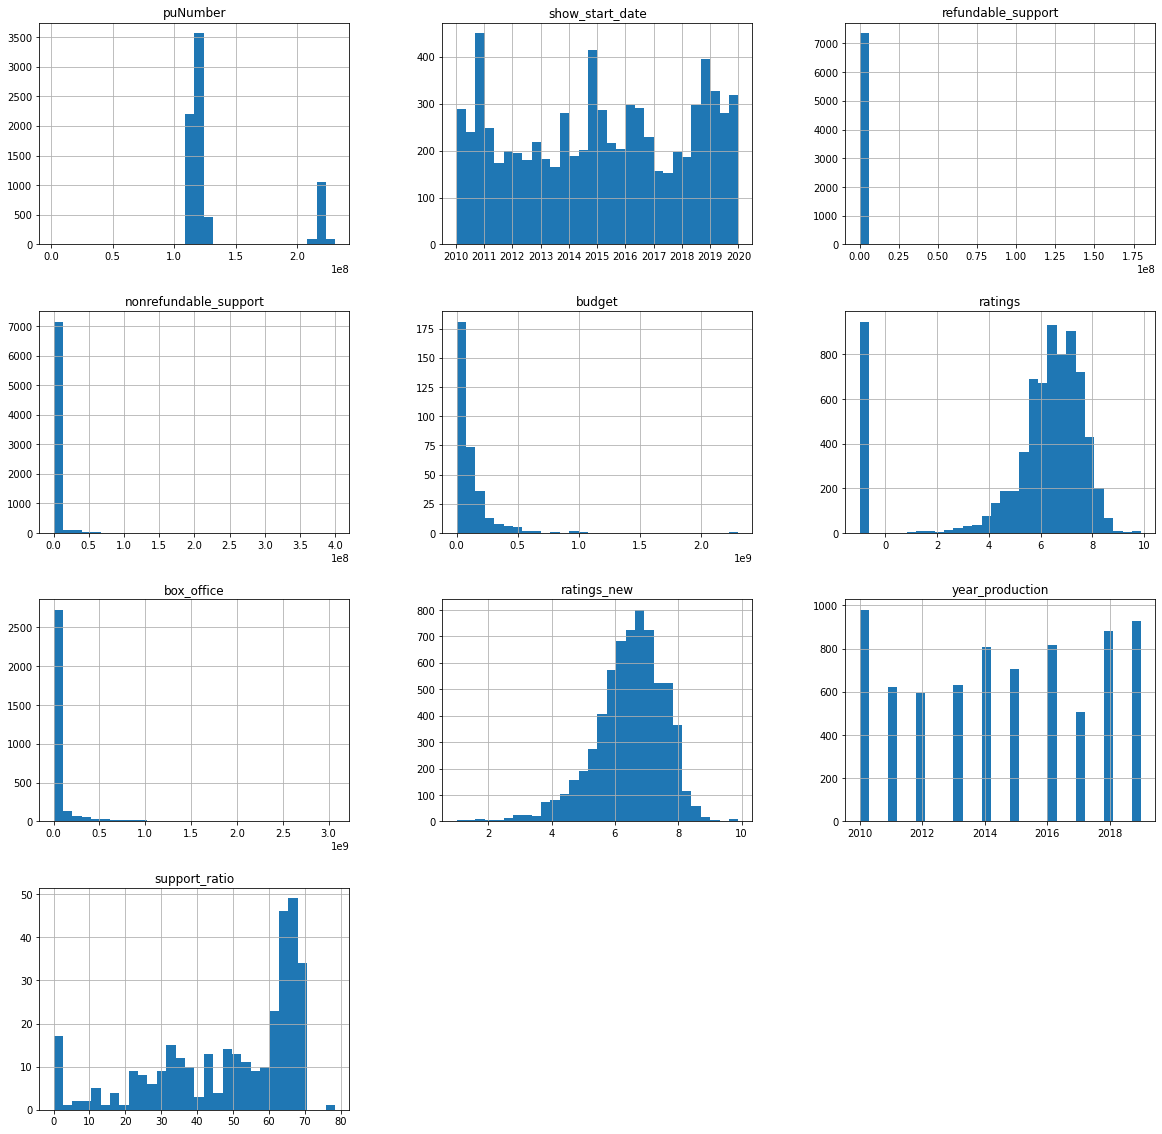

In [76]:
data.hist(bins= 30, figsize=(20, 20))
None

***В целом, по гистограммам видны аномалии только лишь в столбцах `puNumber` и `ratings`. При этом первый - это номер прокатного удостоверения, а значит на него и смотреть не стоит, а во втором аномалия - это пропуски с рейтингом равным `-1`, наши заменённые пропуски в данных.***

**Кроме того, необходимо изучить: "строки, где бюджет нулевой, а господдержка − нет. Это явно не будет соответствовать действительности."**

Приступим.

In [77]:
# сделаем срез данных
# изучим данные, где бюджет равен нулю
display(data.query('box_office.isna() == False').query('budget == 0'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_new,film_studio_lower,year_production,chief_director,main_genre,support_ratio
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,И.Зайцев,"О.Гранина, Ю.Зайцева",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",6.60,"ооо киностудия ""сентябрь""",2014,И.Зайцев,мелодрама,0.00
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00",6.60,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",2015,Р.Прыгунов,драма,0.00
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,С.Андрианова,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40",7.80,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",2015,С.Андрианова,боевик,0.00
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80",6.20,"ззао ""вайт медиа"", ооо ""арт пикчерс студия""",2015,Д.Штурманова,комедия,0.00
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40",4.60,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",2015,М.Фадеев,мультфильм,0.00
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51",6.30,"ооо ""кинокомпания ""коктебель""",2015,М.Местецкий,комедия,0.00
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20",5.10,"ззао ""вайт медиа"", ооо ""арт пикчерс студия""",2015,С Чекалов,комедия,0.00
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43",4.30,"ооо ""кинофирма""",2016,В.Ровенский,комедия,0.00
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00",6.30,"ззао ""вайт медиа"", ооо ""арт пикчерс студия""",2016,Д.Тюрин,комедия,0.00
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,С.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00",5.60,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",2016,С.Бондарчук,фантастика,0.00


***Как видно во всех случаях есть гос. поддержка, а бюджет при этом нулевой. Аномальные данные, но их немного. По сути, есть два варианта либо заменить нули на суммы гос. поддержек, либо просто удалить строки.***

***Также, кроме сумм поддержек можно попробовать сделать следующее: делаем срез по известным сборам, далее подсчитаем для каждого фильма процент гос.поддержки от бюджета, сгруппируем или по "главным жанрам" или "источнику финансирования" (возможны и др. варианты) и при группировке выделим медианы для каждого сгруппированного случая. Затем имея соответствующие проценты, можем расчитать суммы гос. поддержек и через обычную пропорцию вычислить бюджеты фильмов. Однако, данный подход чреват возможными проблемами, связанными с тем, что надо чётко определить по какому параметру надо производить группировку, а это дополнительное исследование, время и главное не факт, что от этого будет какой-то существенный "выхлоп", ведь таких строк всего ничего)).***

**Потому принимаем решение просто удалить аномальные строки.**

In [78]:
for idx in data.query('box_office.isna() == False').query('budget == 0').index:
    data.drop(labels=idx, axis=0, inplace=True)

In [79]:
# Проверим
display(data.query('box_office.isna() == False').query('budget == 0'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_new,film_studio_lower,year_production,chief_director,main_genre,support_ratio


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

В целом, готов провести дополнительное исследование, но из-за ограниченного времени на проект, если возможно, то хотелось бы избежать этого)))
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Думаю, лучше двигаться дальше :) 
</div>


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

,all_films,box_office,ratio,ratio_in_percent
year_production,,,,
2010,978,105,0.11,11.00
2011,620,109,0.18,18.00
2012,592,127,0.21,21.00
2013,629,184,0.29,29.00
2014,804,278,0.35,35.00
2015,699,459,0.66,66.00
2016,814,522,0.64,64.00
2017,503,355,0.71,71.00
2018,875,470,0.54,54.00


<AxesSubplot:title={'center':'ratio_in_percent'}, xlabel='year_production'>

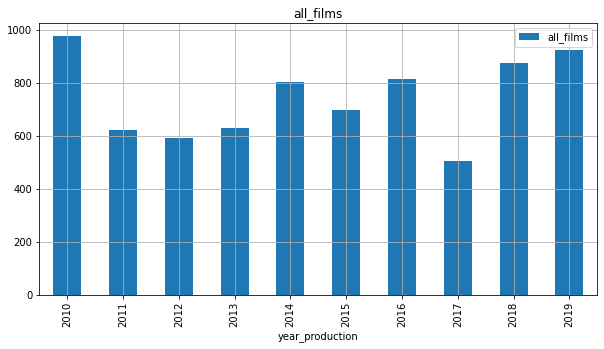

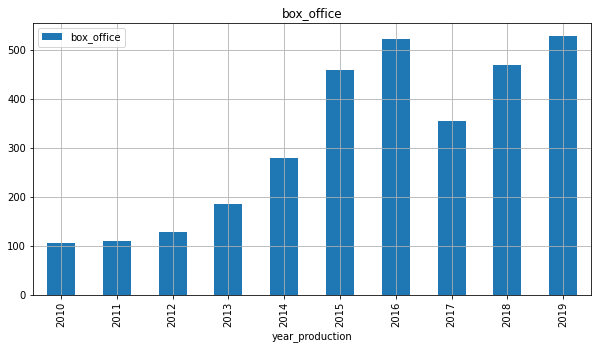

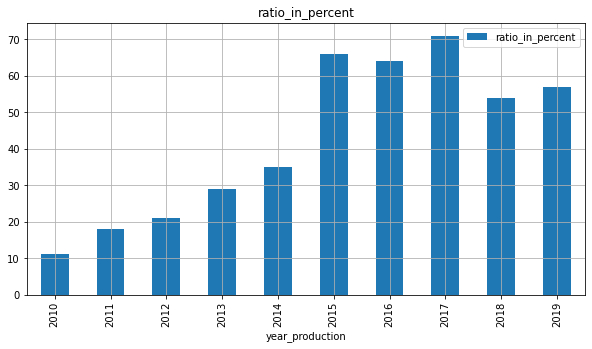

In [80]:
# Соберём данные сгуппированные по годам по всем фильмам
groups_year = data.pivot_table(index='year_production', values='puNumber', aggfunc='count')
groups_year.columns = ['all_films']

# добавим данные по прокату фильмов
groups_year['box_office'] = (data.query('box_office.isna() == False')
                         .pivot_table(index='year_production', values='puNumber', aggfunc='count'))['puNumber']

# вычислим доли прокатных фильмов от их общего числа
groups_year['ratio'] = round(groups_year['box_office'] / groups_year['all_films'], 2)
# для наглядности переведём в проценты
groups_year['ratio_in_percent'] = groups_year['ratio'] * 100

# Проверим результат
display(groups_year)

# Отобразим для удобства диаграммы рядом друг с другом
groups_year.plot(y='all_films', kind='bar', figsize=(10, 5), grid=True, title='all_films')
groups_year.plot(y='box_office', kind='bar', figsize=(10, 5), grid=True, title='box_office')
groups_year.plot(y='ratio_in_percent', kind='bar', figsize=(10, 5), grid=True, title='ratio_in_percent')

***Как видно, число фильмов вышедших в прокат рoсло от года к году (заисключением 2017 года). В целом, явно виден тренд на увеличение числа прокатных фильмов. Кроме того, также растёт доля фильмов, вышедших в прокат, от общего числа фильмов. Кроме того, стоит отметить интересный факт, в 2017 году количество фильмов в прокате существенно "просело" в сравнении с другими годами, однако доля этих фильмов относительно всех фильмов достигла своего пика и превысила 70% ! Также важно отметить, что судя по всему 2017 год был самым тяжелым из представленных, в этот год было меньше всего фильмов.***

**Важно отметить: информация дана по состоянию на 2019 год**.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отличная таблица по коду и структуре. Все, что нужно. Я бы подтянул визуализацию прямо сюда. 
    
Идеальный вариант такой: таблица, график, комментарий.
    
</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Исправил и сделал, как лучше).
    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Выше подсказал, что научную нотацию лучше заменить привычной.
       
</div>


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Tолько называется диаграмма, а не гистограмма. Гистограмма - это hist() - график плотности распределения.
    
По канонам визуализации, если у нас задача показать изменение значения одной метрики во времени, то предпочтительнее использовать линейный график. Можно также и столбчатую диаграмму − барплот.
       
</div>

 

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Хммм.. тонко, я понял спасибо))
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно. Забавно при этом, что 18-19 годы были пиковыми по относительным тратам россиян на развлечения за последние 8 лет. Видимо, онлайн-кинотеатры влияют на сборы.
</div>

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,all_films,box_office,ratio,ratio_in_percent,sum_box_office
year_production,,,,,
2010,978,105,0.11,11.00,"2,428,654.00"
2011,620,109,0.18,18.00,"14,102,765.00"
2012,592,127,0.21,21.00,"6,911,073.00"
2013,629,184,0.29,29.00,"29,799,706.20"
2014,804,278,0.35,35.00,"7,434,717,843.10"
2015,699,459,0.66,66.00,"38,527,827,199.09"
2016,814,522,0.64,64.00,"46,742,121,742.48"
2017,503,355,0.71,71.00,"48,458,147,253.75"
2018,875,470,0.54,54.00,"49,251,950,180.20"


<AxesSubplot:title={'center':'sum_box_office'}, xlabel='year_production'>

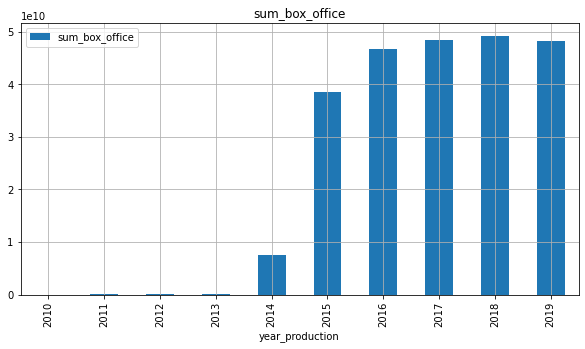

In [81]:
# Для изучения динамики суммы сборов, добавим в существующую сводную таблицу данные по сумме сборов
# добавим данные по прокату фильмов
groups_year['sum_box_office'] = (data.query('box_office.isna() == False')
                         .pivot_table(index='year_production', values='box_office', aggfunc='sum'))['box_office']
# Выведем сводную таблицу
display(groups_year)

# Построим диаграмму по сумме сборов
groups_year.plot(y='sum_box_office', kind='bar', figsize=(10, 5), grid=True, title='sum_box_office')

In [82]:
# Подсчитаем долю (в процентах) известной информации о сборах относительно всех фильмов по годам

for elem in groups_year.index:
    print('Процент фильмов о которых есть информация в прокате за {0} год равен: {1}%'
          .format(elem, round(groups_year['box_office'][elem] / groups_year['all_films'][elem] * 100)))

Процент фильмов о которых есть информация в прокате за 2010 год равен: 11%
Процент фильмов о которых есть информация в прокате за 2011 год равен: 18%
Процент фильмов о которых есть информация в прокате за 2012 год равен: 21%
Процент фильмов о которых есть информация в прокате за 2013 год равен: 29%
Процент фильмов о которых есть информация в прокате за 2014 год равен: 35%
Процент фильмов о которых есть информация в прокате за 2015 год равен: 66%
Процент фильмов о которых есть информация в прокате за 2016 год равен: 64%
Процент фильмов о которых есть информация в прокате за 2017 год равен: 71%
Процент фильмов о которых есть информация в прокате за 2018 год равен: 54%
Процент фильмов о которых есть информация в прокате за 2019 год равен: 57%


***Исходя из диаграммы можно получить следующий вывод: до 2014 года суммы сборов были крайне низкими, затем начался бурный рост до 2016 года, и далее сборы стали стабильно одинаковыми.***

***Однако, выполнив дополнительные вычисления, мы действительно получаем в корне другую ситуацию! Вплоть до 2014 года включительно, мы имеем большой процент пропущенных данных. Только после 2015 года процент известной информации значительно превысил порог в 50%, до этого струдом перевалил за 30%. Исходя из этого, получается интересный вывод: с уменьшением числа пропусков в данных относительно сборов в прокате, растёт и сумма сборов (что в целом логично). Не знаю почему сразу не сделал этого и написал не верный вывод))***

В принципе, можно попробовать даже составить следующее утверждение: Если информации о прокате больше 50%, то с такими данными можно работать и принимать, те или иные решения. Если меньше, то таких данных надо опасаться и работать с ними аккуратно.

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Выше мы исследовали полноту информации по сборам по годам и видели, что до 2014 года у нас огромное количество пропусков в данных. Здесь это следует учитывать. К сожалению, даже делая поправки на доступность данных, до 2014 года мало что можно сказать с уверенностью.

</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Понял, осознал, переделал))
    
</div>

In [83]:
# Посмотрим на максимальные и минимальные сборы
print('Минимальная сумма сборов фильмов, вышедших в прокат, была в {0} году и составляет {1} (в млн. руб. {2}), \n максимальная сумма была в {3} году - {4} (в млн. руб. {5}])'
      .format(groups_year.index[groups_year['sum_box_office'] == groups_year['sum_box_office'].min()][0], groups_year['sum_box_office'].min(), round(groups_year['sum_box_office'].min() / 1000000, 1),
              groups_year.index[groups_year['sum_box_office'] == groups_year['sum_box_office'].max()][0] , groups_year['sum_box_office'].max(), round(groups_year['sum_box_office'].max() / 1000000, 1)))

Минимальная сумма сборов фильмов, вышедших в прокат, была в 2010 году и составляет 2428654.0 (в млн. руб. 2.4), 
 максимальная сумма была в 2018 году - 49251950180.19999 (в млн. руб. 49252.0])


In [84]:
# Посмотрим на максимальные и минимальные сборы
print('Минимальная сумма сборов фильмов, вышедших в прокат, была в {0} году и составляет {1} млн. руб., \n максимальная сумма была в {2} году - {3} млн. руб.'
      .format(groups_year.index[groups_year['sum_box_office'] == groups_year['sum_box_office'].min()][0], round(groups_year['sum_box_office'].min() / 1000000, 1),
              groups_year.index[groups_year['sum_box_office'] == groups_year['sum_box_office'].max()][0] , round(groups_year['sum_box_office'].max() / 1000000, 1)))

Минимальная сумма сборов фильмов, вышедших в прокат, была в 2010 году и составляет 2.4 млн. руб., 
 максимальная сумма была в 2018 году - 49252.0 млн. руб.


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

,all_films,box_office,ratio,ratio_in_percent,sum_box_office,mean,median
year_production,,,,,,,
2010,978,105,0.11,11.00,"2,428,654.00","23,130.04","1,700.00"
2011,620,109,0.18,18.00,"14,102,765.00","129,383.17","3,000.00"
2012,592,127,0.21,21.00,"6,911,073.00","54,417.90","5,560.00"
2013,629,184,0.29,29.00,"29,799,706.20","161,954.92","3,522.50"
2014,804,278,0.35,35.00,"7,434,717,843.10","26,743,589.36","18,137.50"
2015,699,459,0.66,66.00,"38,527,827,199.09","83,938,621.35","4,784,781.50"
2016,814,522,0.64,64.00,"46,742,121,742.48","89,544,294.53","3,777,202.68"
2017,503,355,0.71,71.00,"48,458,147,253.75","136,501,823.25","9,919,415.00"
2018,875,470,0.54,54.00,"49,251,950,180.20","104,791,383.36","8,821,498.98"


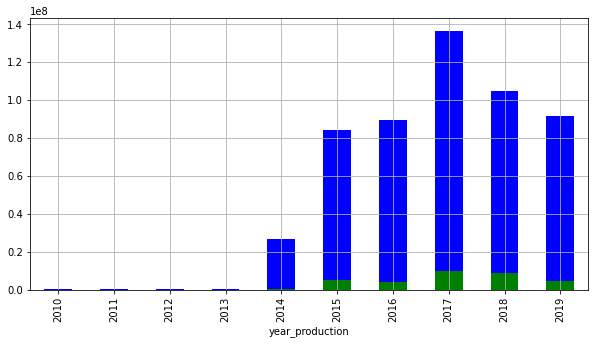

In [85]:
# для подсчета средних и медианных значений сумм сборов добавим в нашу уже созданную таблицу новые данные
groups_year[['mean', 'median']] = (data.query('box_office.isna() == False')
                         .pivot_table(index='year_production', values='box_office', aggfunc=['mean', 'median']))[['mean', 'median']]

# Выведем сводную таблицу
display(groups_year)

# Построим диаграммы для средних и медианных значений

mean = groups_year['mean']
median = groups_year['median']

mean.plot(y='mean', kind='bar', figsize=(10, 5), grid=True, color='b', label='mean')
median.plot(y='median', kind='bar', figsize=(10, 5), grid=True, color='g', label='median')

plt.show()

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

А вот здесь было бы круто разместить медиану и среднее на одном графике, чтобы сравнить масштаб. Пока это считывается плохо.
       
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Долго мучился, пытаясь понять как правильно записать, чтобы отобразить всё сразу на одном графике. Оказалось еще в самом начале сделал, просто та диаграмма что получалась в итоге, мне казалась слишком неправильной)). И только спустя кучу времени до меня дошло, что это НЕ неправильно, а это настолько сильна разница между средним и медианным значениями!!!
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Эх))) Ну что-ж, бывает.
</div>


***Как видно из данных диаграмм, средние значения получились в несколько раз больше медианных. Это может говорить нам о том, что в наших данных довольно много аномально больших значений, которые приводят к такому результату. Из этого можно сделать, вывод, что при оценке усредненных значений по сумме сборов, лучше всего использовать медиану, так как она лучше подойдёт для будущих оценок и возможного прогнозирования будущих сборов.***

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [86]:
# Произведём группировку данных по столбцу "возрастной ценз" с учетом различных годов
group_age_restriction = (data.query('box_office.isna() == False')
                         .pivot_table(index='age_restriction', columns='year_production', values='box_office', aggfunc='sum'))

display(group_age_restriction)

year_production,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
age_restriction,,,,,,,,,,
«0+» - для любой зрительской аудитории,"1,887,611.00","13,499,871.00","2,222,133.00","2,710,302.50","375,562,258.20","379,054,578.37","150,034,321.67","229,598,930.00","32,449,002.11","17,746,066.82"
«12+» - для детей старше 12 лет,"120,146.00","219,891.00","108,734.00","20,910,336.50","2,584,782,324.00","13,419,509,570.51","11,150,762,103.96","7,851,427,660.67","14,267,250,435.69","12,680,198,773.67"
«16+» - для детей старше 16 лет,"366,512.00","381,513.00","3,254,216.00","658,069.60","534,046,070.60","10,781,600,601.27","16,594,249,489.74","18,694,590,951.06","16,278,405,946.93","12,753,418,984.60"
«18+» - запрещено для детей,"54,385.00","1,040.00","182,580.00","5,161,245.60","2,209,712,746.90","5,430,350,628.93","6,793,929,818.87","9,651,495,581.02","8,760,085,501.15","10,121,796,303.64"
«6+» - для детей старше 6 лет,NaN,450.00,"1,143,410.00","359,752.00","1,730,614,443.40","8,517,311,820.01","12,053,146,008.24","12,031,034,131.00","9,913,759,294.32","12,704,941,824.35"


Построим два общих графика по всей таблице, потому что как показала практика, диаграммы слишком сильно друг друга перекрывают, один график будем запускать сконца, другой сначала.

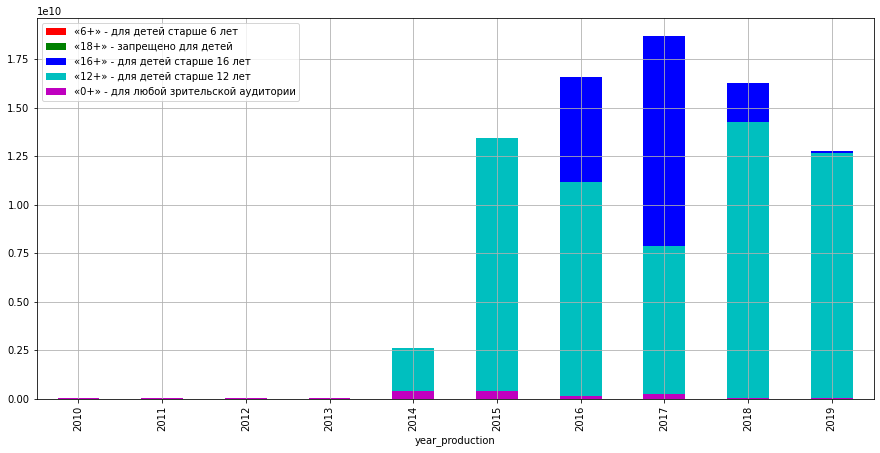

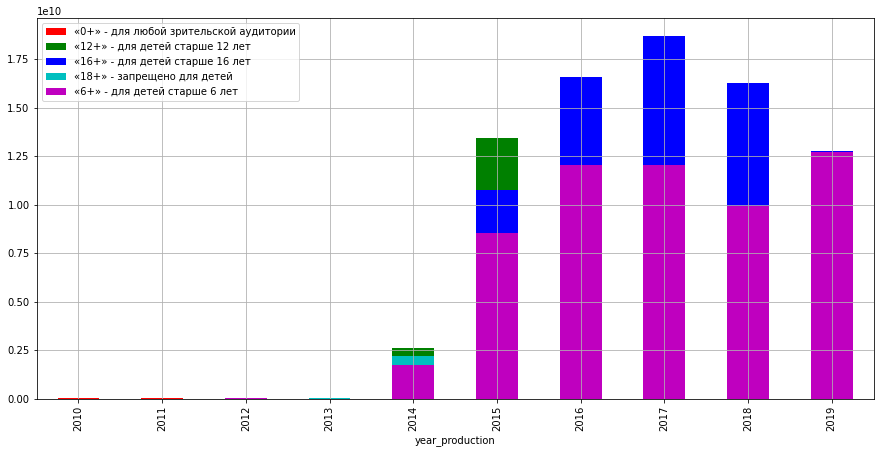

In [87]:
color =['r','g', 'b', 'c', 'm'] # добавим массив с обозначениями цветов, для простого перебора в цикле

# запускаем цикл сконца 
i = 0
for year in reversed(group_age_restriction.index):
    
    (np.transpose(group_age_restriction)[year]
         .plot(kind='bar', figsize=(15, 7), grid=True, color=color[i]))
    
    i += 1
    
plt.legend()
plt.show()

# запускаем цикл cначала
i = 0
for year in group_age_restriction.index:
    
    (np.transpose(group_age_restriction)[year]
         .plot(kind='bar', figsize=(15, 7), grid=True, color=color[i]))
    
    i += 1
    
plt.legend()
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отличная таблица. Кажется, ее можно транспонировать, приделать к ней `.plot()` и получить отличный график. Предлагаю так и сделать.
</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Постарался всё уместить в один график, но пришлось делать всё-таки два))
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 А можно было бы линейный. Кстати. Про транспонировать - это была не шутка. Ниже покажу (если дождусь, как выполняется код). Нам нужна всего одна строка. Я беру tail(6), так как увидели, что по раннему периоду у нас недостаточно полноты данных).
    
Транспонировать таблицу можно очень просто: `data.T`. Когда строим графики, то в таблицах временная ось идет по строкам обычно, поэтому лучше изначально в сводных таблицах годы располагать в индексах. 
</div>


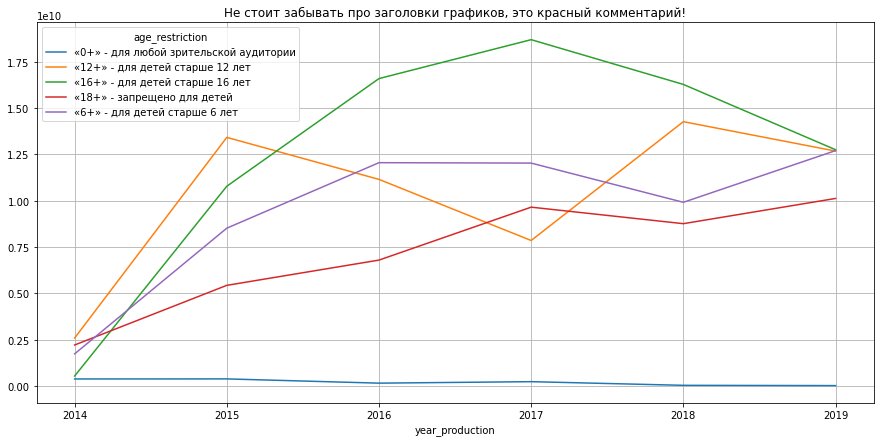

In [89]:
# код ревьюера
group_age_restriction.T.tail(6).plot(figsize=(15, 7), grid=True, title='Не стоит забывать про заголовки графиков, это красный комментарий!');

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Не уверен, что гистограммы нам тут о чем-то важном расскажут. Я бы их убрал. Но если есть мысли, можно прокомментировать графики.

</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Полностью согласен, изначально построил их, но так и не понял, что мне это даёт))). Но удалять не стал. Сейчас просто убрал в другой тип ячеек, чтобы понимать о чём была речь.
    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь интереснее, но лучше изобразить все на одном линейном. Как написал выше, таблицу нужно будет транспонировать `data.T`
       
</div>

 

**По результатам выведенных диаграмм можно сделать следующие выводы:**
* В 2010 и 2011 самые большие сборы в прокате собирали фильмы категории "0+", имея абсолютное доминирование в прокате.
* В 2012 ситуация в корне изменилась. В этот год "собрали кассу" категории "16+" и "6+", которые в дальнейшем только росли из года в год.
* Также, не маловажен тот факт, что почти все категории (кроме "0+") имеют восходящий тренд роста сборов. Пока не понятно почему в категории "0+" имеется столь сильная просадка по количеству сборов.
* В целом, чтобы не перечислять все года, можно с уверенностью сказать, что фильмы категории "16+" начиная с 2012 года стали собирать самые большие суммы в прокате.
* Также, важно отметить, что 2014 год стал поворотным с точки зрения проката фильмов, т.к. именно в этот год произошёл значительный рост сборов фильмов.

***Однако, прежде чем однозначно утверждать, что фильмы категории "16+" - самые выгодные. Надо провести дополнительное исследование и узнать, возможно подобный рост сборов связан не столько с самими сборами, сколько с количеством фильмов выпускаемых в данной категории.***

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен. 
    
ОДНАКО, нужно понимать (по сопоставлению среднего и медианы), что выпускаются ежегодно сотни фильмов, а в 95% кинотеатрах крутятся по 3-4 картины в месяц, из которых 1-2 собирают кассу. Поэтому здесь логично ориентироваться на выбросы (уникальная ситуация, кажется, во всех остальных проектах курса мы будем в аналитике бороться с выбросами).
</div>


age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_production,,,,,
2010,22.0,17.0,58.0,8.0,NaN
2011,30.0,22.0,54.0,2.0,1.0
2012,30.0,16.0,49.0,17.0,16.0
2013,37.0,60.0,45.0,16.0,26.0
2014,38.0,84.0,82.0,45.0,30.0
2015,39.0,73.0,168.0,132.0,53.0
2016,41.0,82.0,182.0,151.0,70.0
2017,3.0,41.0,121.0,147.0,45.0
2018,5.0,67.0,156.0,179.0,68.0


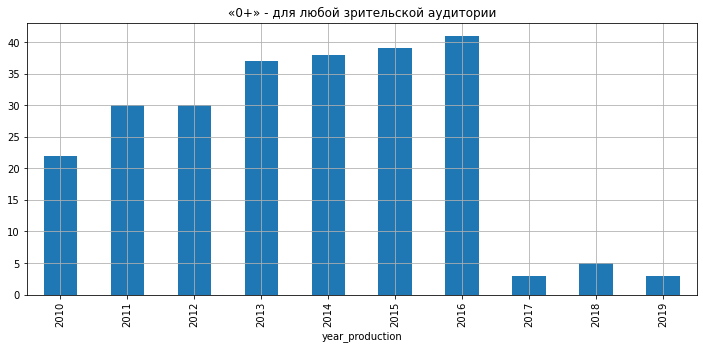

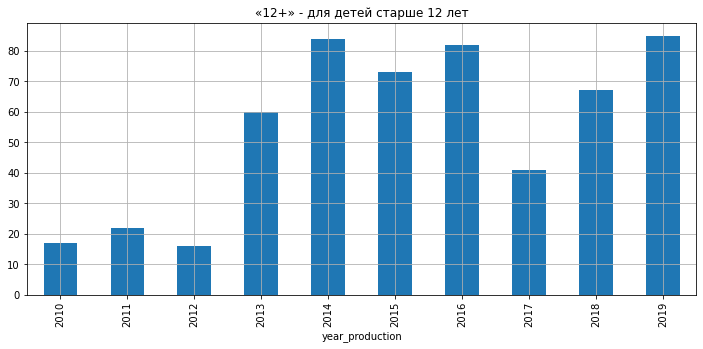

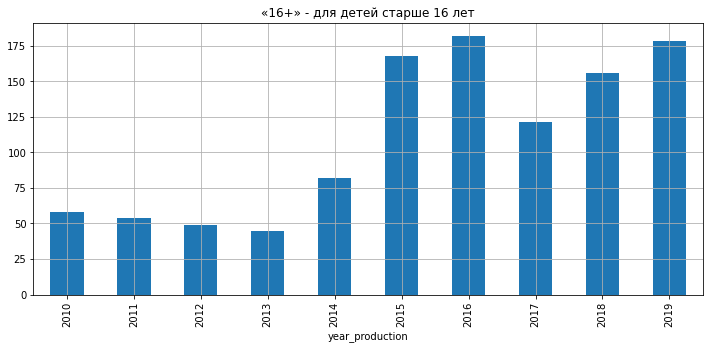

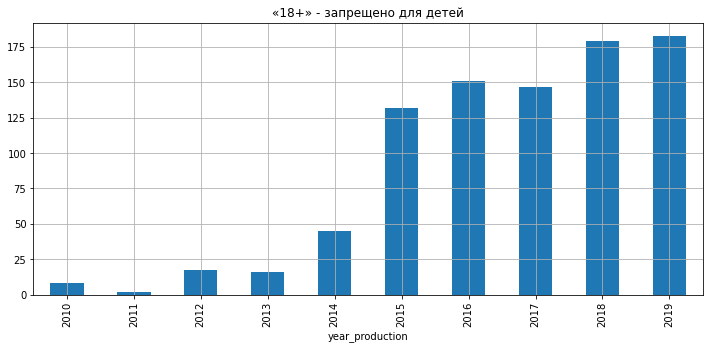

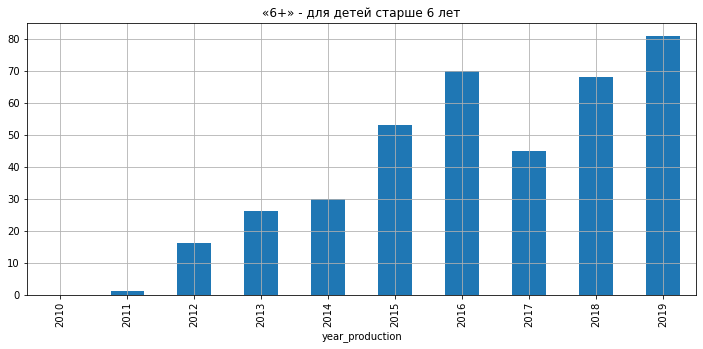

In [97]:
group_age_counts = (data.query('box_office.isna() == False')
                         .pivot_table(index='year_production', columns='age_restriction', values='box_office', aggfunc='count'))
display(group_age_counts)

for row in group_age_counts:
    group_age_counts[row].plot(y='year_production', kind='bar', figsize=(12, 5), grid=True, title=row)
    plt.show()

***Как видно на дополнительно построенных диаграммах, можно в принципе сказать, что рост сборов фильмов в превую очередь связан с выпускаемым количеством этих фильмов. И как раз на данных диаграммах можем наблюдать, что суммы сборов фильмов категории "0+" стали падать именно из-за того, что самих фильмов стало существенно меньше. В то время как во всех остальных категориях наблюдается рост числа фильмов.***

Далее по пробуем оценить, сколько в среднем зарабатывал фильм каждой категории по годам. Данный подход поможет более реально оценить, насколько много может заработать фильм той или иной категории (будем рассматривать на основе медиан).

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

У меня стойкое предчувствие, что кто-от обрабатывал наш датасет до нас и занулил пропуски в возрастной категории, заботливо заменив их не просто нулем, на «0+». Поэтому переживать за снижение доли фильмов для карапузов я бы не стал.
       
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Хммм.. Интересное наблюдение)))
    
</div>

In [192]:
group_age_median = (data.query('box_office.isna() == False')
                         .pivot_table(index='age_restriction', columns='year_production', values='box_office', aggfunc='median'))
display(group_age_median)                                                                                                                        

year_production,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
age_restriction,,,,,,,,,,
«0+» - для любой зрительской аудитории,"6,052.50","7,010.00","17,715.00","13,225.00","190,855.00","2,943,318.70","2,687,778.55","22,178,956.00","3,616,937.28","3,885,434.50"
«12+» - для детей старше 12 лет,"2,650.00","3,741.50","3,685.00","2,250.00","6,037.50","15,144,119.40","4,225,478.26","9,010,548.00","10,035,323.33","3,405,545.76"
«16+» - для детей старше 16 лет,"1,000.00","2,835.00","1,600.00","3,300.00","13,420.00","4,321,194.60","5,085,192.98","9,641,407.50","8,751,895.75","3,210,717.81"
«18+» - запрещено для детей,915.00,520.00,"1,385.00","1,775.00","180,108.00","4,654,761.40","6,107,001.74","8,212,677.00","7,179,466.00","5,603,216.55"
«6+» - для детей старше 6 лет,NaN,450.00,"6,475.00","3,457.50","125,810.00","19,513,253.93","3,026,256.15","50,274,982.00","14,458,669.43","12,525,531.67"


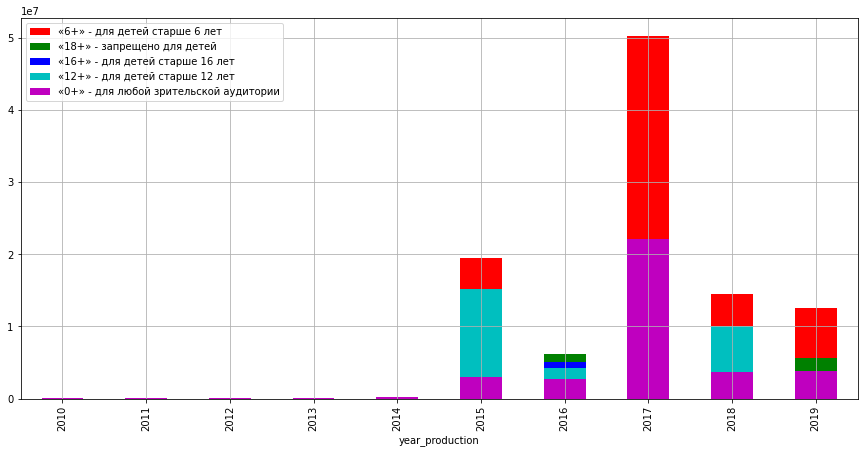

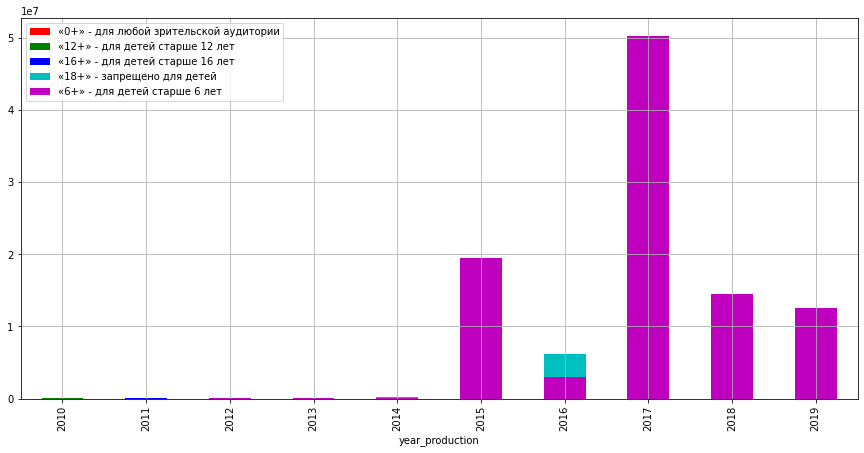

In [193]:
color =['r','g', 'b', 'c', 'm'] # добавим массив с обозначениями цветов, для простого перебора в цикле

# запускаем цикл сконца 
i = 0
for year in reversed(group_age_median.index):
    
    (np.transpose(group_age_median)[year]
         .plot(kind='bar', figsize=(15, 7), grid=True, color=color[i]))
    
    i += 1
    
plt.legend()
plt.show()

# запускаем цикл cначала
i = 0
for year in group_age_median.index:
    
    (np.transpose(group_age_median)[year]
         .plot(kind='bar', figsize=(15, 7), grid=True, color=color[i]))
    
    i += 1
    
plt.legend()
plt.show()

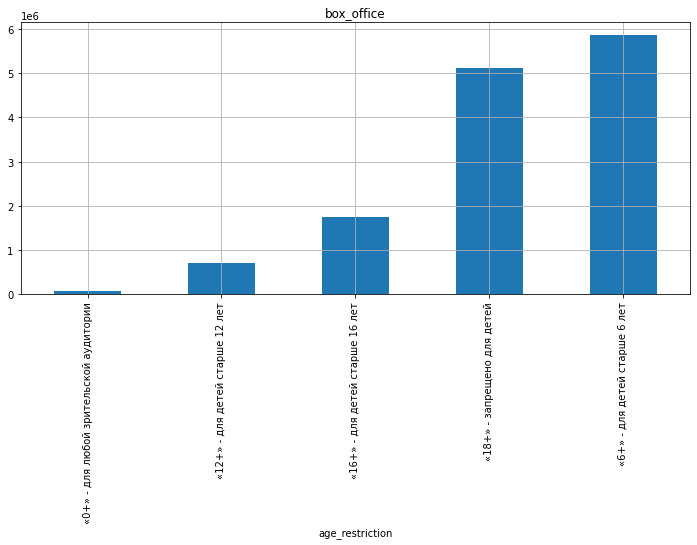

In [114]:
# Добавим усреднённые значения по всем годам
group_age_median_not_year = (data.query('box_office.isna() == False')
                         .pivot_table(index='age_restriction', values='box_office', aggfunc='median'))

#display(group_age_median_not_year) 

for row in group_age_median_not_year:
    group_age_median_not_year[row].plot(y='age_restriction', kind='bar', figsize=(12, 5), grid=True, title=row)
    plt.show()

**Как видно, динамика если так можно назвать "эффективности" категорий показывает уже не много другой результат.**
* Если до этого момента можно было с уверенностью сказать, что если хочешь заработать денег, то уходи в категорию "16+", то теперь ситуация уже другая. Данная категория действительно в сумме приносит больше всего денег, но в пересчёте на один фильм ситуация уже другая. Фильмы "16+" являются уверенными "средниками" и в общей массе не часто выстреливают.
* Что не скажешь про категории "18+" и "6+", которые с 2014 взяли курс на рост так в результате и стали реальными лидерами. Получается, что в контексте сборов именно для создателей фильмов данные категории являются самыми результативными и приносят больше всего денег.

***Весьма неожиданный результат мы получили в итоге данного исследования!***

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен. Круто, что посмотрели по медиане! Хорошая аналитика получилась.
</div>



<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
И здесь также нужен промежуточный вывод по шагу. Не обязательно здесь писать много - главное − вытянуть главное. И потом промежуточные выводы очень удобно использовать для написания итогового. Так что, не вижу оснований с этим лениться :)

</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Исправим это недоразумение)
    
</div>

**Исследование количества фильмов выпущенных в период с 2014 по 2019 год, а также влияния возрастных ограничений на сборы в прокате, завершено.** 

По результатам данного исследования мы выяснили, что:
* использовать показатель "сумма сборов за год" надо "аккуратно", предварительно выяснив сколько мы имеем пропусков в данных, потому что если их ощутимо больше 50%, то этот показатель не будет объективно представлять данные (на чём я и попался =) );
* показатель "средних сборов за фильм" может ракрыть дополнительную информацию, которая может в корне изменить наши выводы об исследуемом объекте. Так в нашем исследовании мы пришли к выводу, что несмотря на самые большие сборы в категории "16+" в среднем такие фильмы не выделяются особо своими сборами в прокате.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично!
</div>


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

#### Изучение выделений средств на производство фильмов относительно источников финансирования, а также сборов этих фильмов

In [71]:
# Сделаем срез данных основанный на фильмах, которые делали при гос. поддержке
state_support = data.query('financing_source != "Иной источник"')
display(state_support.head())
print(state_support['financing_source'].unique())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_new,film_studio_lower,year_production,chief_director,main_genre,support_ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",8.10,"ано содействия развитию кинематографии ""ангел-...",2013,А.Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,-1.00,неизвестно,"28,140.00",NaN,"ооо ""компания ""атк-студио""",2014,А.Якимчук,неизвестно,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",5.30,"ооо ""компания ""реал-дакота"".",2013,Р.Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),В.Антонов,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",4.20,"ооо ""студия ""пассажир""",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, В.Антонов",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",6.40,"ооо ""студия ""пассажир""",2014,М.Угаров,драма,62.48


['Министерство культуры' 'Фонд кино' 'Министерство культуры, Фонд кино']


In [72]:
# Соберём сводную таблицу, содержащую суммы и медианы "сборов в прокате", "возвратных средств" 
# и "не возвратных средств" по источнику финансирования

values_source = ['box_office', 'budget','refundable_support', 'nonrefundable_support']

group_finance_source = state_support.pivot_table(index='financing_source', values=values_source, aggfunc=['sum','median'])
display(group_finance_source)

sum                    \
                                        box_office            budget   
financing_source                                                       
Министерство культуры             5,306,655,396.50 11,469,203,758.00   
Министерство культуры, Фонд кино    795,104,402.16  2,626,309,609.00   
Фонд кино                        33,238,415,770.89 28,144,752,572.00   

                                                                           \
                                 nonrefundable_support refundable_support   
financing_source                                                            
Министерство культуры                 4,830,661,000.00               0.00   
Министерство культуры, Фонд кино        836,931,354.00     325,500,000.00   
Фонд кино                             9,486,126,493.00   3,329,500,000.00   

                                        median                 \
                                    box_office         budget   
financing_source                                                
Министерство культуры             1,760,990.00  48,571,430.00   
Министерство культуры, Фонд кино  8,425,367.60  75,000,135.00   
Фонд кино                        86,371,124.57 150,008,573.00   

                                                                           
                                 nonrefundable_support refundable_support  
financing_source                                                           
Министерство культуры                    28,000,000.00               0.00  
Министерство культуры, Фонд кино         30,000,000.00       9,000,000.00  
Фонд кино                                40,000,000.00      15,000,000.00

***Уже на этом этапе видно, что Министерство культуры выделяет средства на производство фильмов исключительно на благотворительной основе)***

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Да, кажется, что так.
</div>


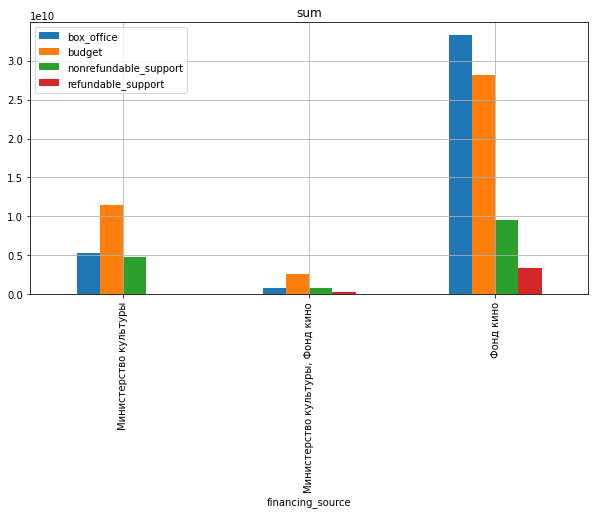

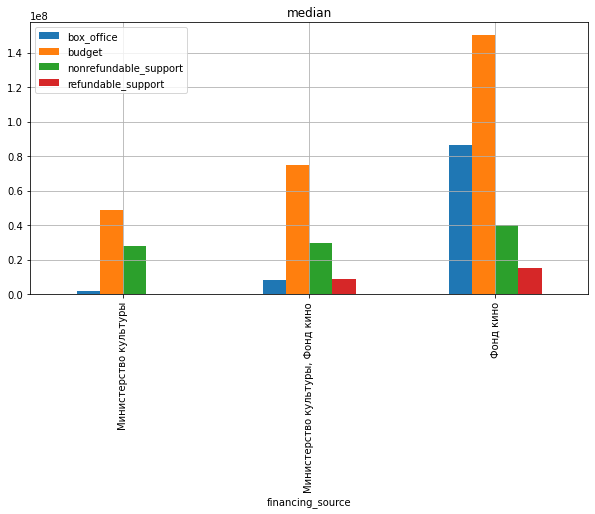

In [73]:
# Построим диаграммы
for row in ['sum', 'median']:
    group_finance_source.plot(y=row, kind='bar', figsize=(10, 5), grid=True, title=row)

**По данным диаграммам можно сделать следующие выводы:**
* Диаграмма общие суммы сборов:
    * чаще всех поддержку оказывает Фонд кино;
    * общие сборы у фильмов с поддержкой Фонда кино самые высокие;
    * общая сумма бюджетов фильмов созданных при поддержке Министерства культуры значительно превосходит сборы этих фильмов;
    * Министерство культуры и Фонд кино редко совместно финансируют фильмы.
* Диаграмма медианы сборов:
    * в среднем, количество вложеных средств гос. поддержки не окупается (если вообще окупается);
    * фильмы созданные при поддержке Фонда кино имеют самые большие сборы и бюджеты;
    * фильмы в финансировании, которых принимало участие Министерство культуры в крайней степени убыточные (средний бюжет таких фильмов более чем в 4 раза больше средних сборов).
    
***Как было отмечено ранее, Министерство культуры выделяет деньги на благотворительной основе, в то время как Фонд кино, требует возврата части выделенных средств.***

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Фонд кино, условно говоря, поддерживает стартапы и больше про кинобизнес, а Минкульт − продвигает интересы государства в области культуры.
</div>


#### Изучение влияния рейтинга фильмов с гос. поддержкой на сборы в прокате относительно источников финансирования.

In [74]:
# Посмотрим на средний рейтинг фильмов относительно источника финансирования
group_finance_source_rating = state_support.pivot_table(index='financing_source', values='ratings', aggfunc='median')
display(group_finance_source_rating)

,ratings
financing_source,
Министерство культуры,6.20
"Министерство культуры, Фонд кино",6.40
Фонд кино,6.00


***Неинформативно, добавим информацию о выделенных средствах и сборах.***

In [75]:
values_source = ['box_office', 'budget']
group_finance_source_rating = state_support.pivot_table(index='financing_source', columns='ratings', values=values_source, aggfunc='median')
display(group_finance_source_rating)

box_office                             \
ratings                                  -1.00        1.00          2.50    
financing_source                                                            
Министерство культуры               420,690.00          NaN           NaN   
Министерство культуры, Фонд кино 11,332,412.00          NaN           NaN   
Фонд кино                        11,011,814.30 7,323,648.00 70,798,668.90   

                                                                              \
ratings                                  2.80           2.90           3.00    
financing_source                                                               
Министерство культуры                      NaN   5,729,521.00            NaN   
Министерство культуры, Фонд кино           NaN            NaN            NaN   
Фонд кино                        38,334,497.27 342,898,736.00 262,040,254.00   

                                                                            \
ratings                                  3.10          3.20          3.30    
financing_source                                                             
Министерство культуры                      NaN  9,197,107.51           NaN   
Министерство культуры, Фонд кино           NaN           NaN           NaN   
Фонд кино                        37,266,709.89 29,822,146.51 11,034,433.20   

                                                                            \
ratings                                  3.50          3.80          3.90    
financing_source                                                             
Министерство культуры                      NaN           NaN 57,771,924.38   
Министерство культуры, Фонд кино           NaN           NaN           NaN   
Фонд кино                        30,325,879.15 32,244,810.00           NaN   

                                                                         \
ratings                                  4.00       4.20          4.30    
financing_source                                                          
Министерство культуры            16,700,822.73 489,382.75           NaN   
Министерство культуры, Фонд кино           NaN        NaN           NaN   
Фонд кино                                  NaN        NaN 19,027,901.76   

                                                                              \
ratings                                  4.50           4.60           4.70    
financing_source                                                               
Министерство культуры                      NaN            NaN  37,982,144.99   
Министерство культуры, Фонд кино           NaN            NaN            NaN   
Фонд кино                        53,834,509.81 100,874,704.69 175,799,581.00   

                                                                              \
ratings                                   4.80           4.90          5.00    
financing_source                                                               
Министерство культуры              1,760,990.00   2,905,469.51    543,899.75   
Министерство культуры, Фонд кино   4,954,508.00            NaN    310,738.00   
Фонд кино                        154,205,241.35 184,731,757.62 24,101,208.37   

                                                                            \
ratings                                  5.10          5.20          5.30    
financing_source                                                             
Министерство культуры               435,132.00 55,833,689.24  2,258,384.00   
Министерство культуры, Фонд кино           NaN           NaN           NaN   
Фонд кино                        76,821,312.08           NaN 85,405,423.61   

                                                ...        budget  \
ratings                                  5.40   ...         6.10    
financing_source                                ...                 
Министерство культуры               596,072.00  ... 50,000,000.00

***Мы получили слишком много вариаций рейтингов, сведём их к конкретным группам.***

До 5 звёзд, до 6 звёзд, до 7 звёзд, до 7.5 звёзд, до 8 звёзд, до 8.5 звёзд, до 9 звёзд, свыше 9 звёзд.

In [76]:
array_ratings = str.split('до 5 звёзд, до 6 звёзд, до 7 звёзд, до 7.5 звёзд, до 8 звёзд, до 8.5 звёзд, до 9 звёзд, свыше 9 звёзд', ', ')
#print(array_ratings)
values_rating = [5, 6, 7, 7.5, 8, 8.5, 9, 10]
group_ratings = {}

i = 0
while i < len(values_rating):
    group_ratings[array_ratings[i]] = values_rating[i]
    i += 1
    
display(group_ratings)

{'до 5 звёзд': 5,
 'до 6 звёзд': 6,
 'до 7 звёзд': 7,
 'до 7.5 звёзд': 7.5,
 'до 8 звёзд': 8,
 'до 8.5 звёзд': 8.5,
 'до 9 звёзд': 9,
 'свыше 9 звёзд': 10}

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Сначала решил, что мы посчитали количество селебрити на киноленту.
</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

В этом моменте чуть со смеха не упал =)

Думал типа рейтинг, сколько звёзд, всё и так понятно сразу))
    
</div>

In [77]:
# Добавим функцию, которая будет добавлять во фрейм группу рейтинга фильма
def rating_groups(rating):
    for key in group_ratings.keys():
        if (rating < group_ratings[key]):
            return key

In [78]:
# Применим новую функцию нашему срезу данных
state_support['group_ratings'] = state_support['ratings'].apply(rating_groups)
state_support.head()

/tmp/ipykernel_72/1168151482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_support['group_ratings'] = state_support['ratings'].apply(rating_groups)


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_new,film_studio_lower,year_production,chief_director,main_genre,support_ratio,group_ratings
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",8.10,"ано содействия развитию кинематографии ""ангел-...",2013,А.Атанесян,драма,33.37,до 8.5 звёзд
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,-1.00,неизвестно,"28,140.00",NaN,"ооо ""компания ""атк-студио""",2014,А.Якимчук,неизвестно,70.00,до 5 звёзд
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",5.30,"ооо ""компания ""реал-дакота"".",2013,Р.Давлетьяров,комедия,61.27,до 6 звёзд
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),В.Антонов,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",4.20,"ооо ""студия ""пассажир""",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01,до 5 звёзд
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, В.Антонов",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",6.40,"ооо ""студия ""пассажир""",2014,М.Угаров,драма,62.48,до 7 звёзд


**Теперь повторим и сделаем сводную таблицу на основе сгруппированных рейтингов**

In [79]:
values_source = ['box_office', 'budget']
group_finance_source_rating = state_support.pivot_table(index='financing_source', columns='group_ratings', values=values_source, aggfunc='median')
display(group_finance_source_rating)

box_office                               \
group_ratings                       до 5 звёзд    до 6 звёзд     до 7 звёзд   
financing_source                                                              
Министерство культуры             1,141,711.25  1,542,497.47   2,325,871.10   
Министерство культуры, Фонд кино  8,143,460.00    184,619.00   9,977,812.50   
Фонд кино                        37,800,603.58 69,693,747.93 119,607,532.46   

                                                                               \
group_ratings                      до 7.5 звёзд     до 8 звёзд   до 8.5 звёзд   
financing_source                                                                
Министерство культуры              1,447,062.50  27,853,374.23     365,353.60   
Министерство культуры, Фонд кино  45,893,083.96   8,425,367.60     410,058.00   
Фонд кино                        120,719,037.80 280,230,931.88 408,646,665.70   

                                                                      budget  \
group_ratings                        до 9 звёзд свыше 9 звёзд     до 5 звёзд   
financing_source                                                               
Министерство культуры                       NaN    568,060.00  51,458,814.00   
Министерство культуры, Фонд кино            NaN           NaN  72,543,287.00   
Фонд кино                        238,872,485.85           NaN 113,837,339.00   

                                                                               \
group_ratings                        до 6 звёзд     до 7 звёзд   до 7.5 звёзд   
financing_source                                                                
Министерство культуры             43,651,254.50  51,523,355.50  46,197,713.50   
Министерство культуры, Фонд кино  69,245,303.00  86,210,067.00 219,018,895.00   
Фонд кино                        115,868,081.50 170,122,675.00 114,301,256.00   

                                                                               \
group_ratings                        до 8 звёзд   до 8.5 звёзд     до 9 звёзд   
financing_source                                                                
Министерство культуры             71,517,631.00  56,205,950.00            NaN   
Министерство культуры, Фонд кино 130,000,000.00  63,170,000.00            NaN   
Фонд кино                        260,000,000.00 240,041,307.00 270,294,197.00   

                                                
group_ratings                    свыше 9 звёзд  
financing_source                                
Министерство культуры            27,231,232.00  
Министерство культуры, Фонд кино           NaN  
Фонд кино                                  NaN

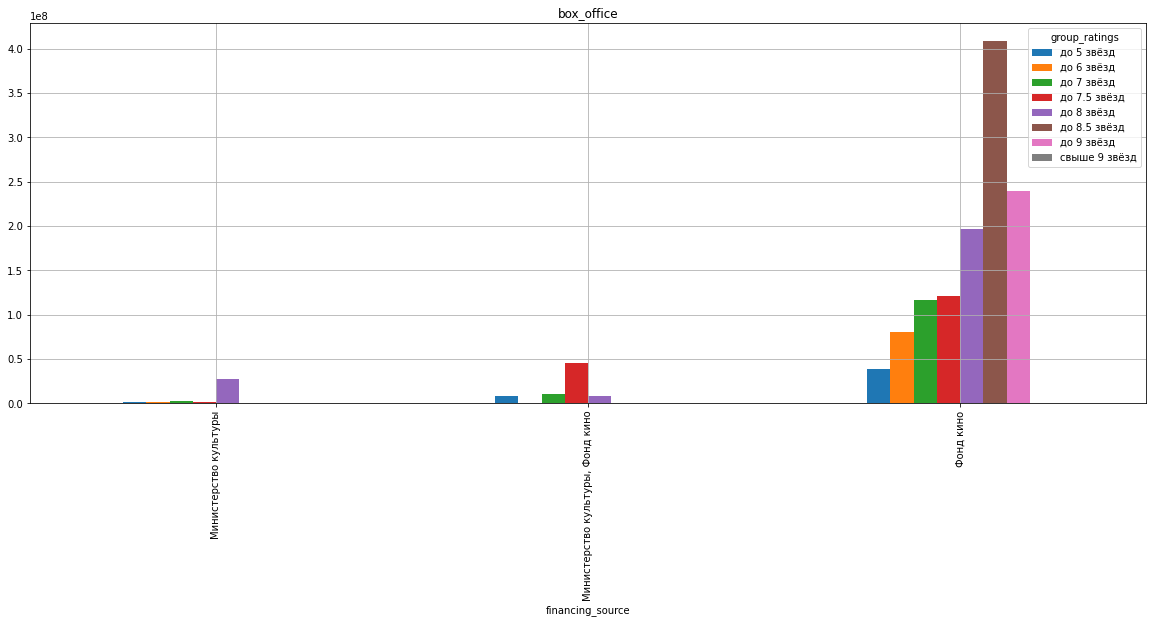

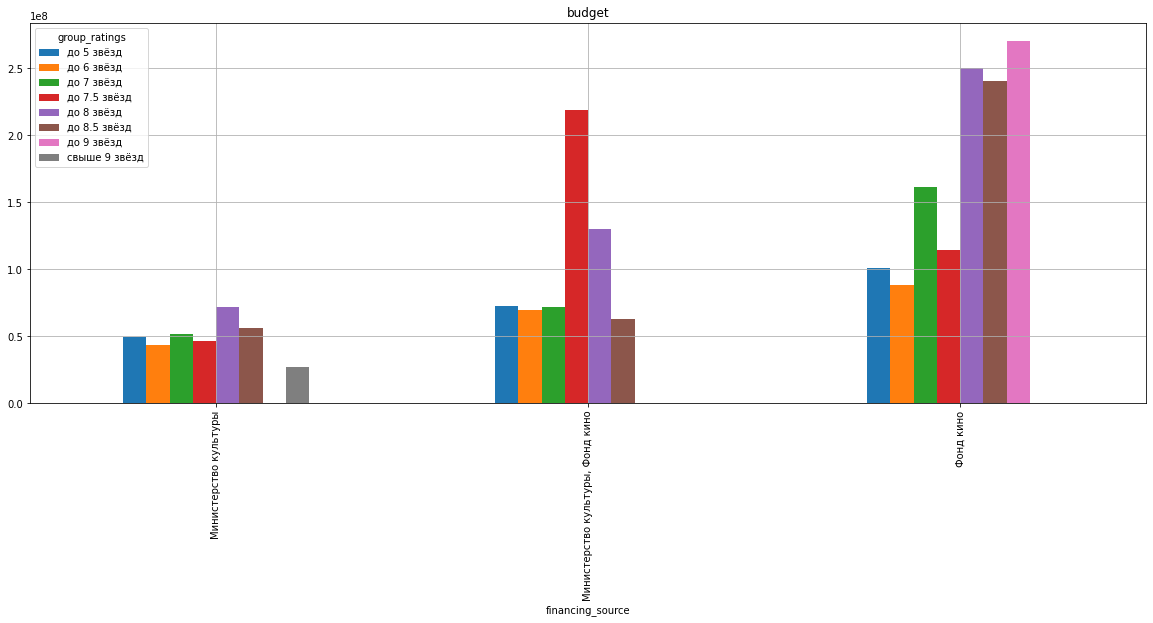

In [82]:
for row in ['box_office', 'budget']:
    group_finance_source_rating.plot(y=row, kind='bar', figsize=(20, 7), grid=True, title=row)

**По данным диаграммам можно сделать следующие выводы:**
* Диаграмма средние сборы фильмов:
    * самые большие сборы по категориям получили фильмы с высоким рейтингом свыше 6 звёзд (что логично);
    * фильмы при поддержке исключительно Фонда Кино даже с самым низким рейтингом в среднем собирают столько же сколько и самые кассовые фильмы с поддержкой Министерства культуры;
    * самыми кассовыми фильмами Фонда кино становятся фильмы с рейтингом выше 7.5 звёзд;
    * самые рейтинговые фильмы в среднем собирают свыше 50 млн. (а в случае с Фондом кино более 100 млн.)
* Диаграмма средний бюджет фильмов:
    * бюджеты фильмов Министерства культуры в среднем самые низкие, и напротив у Фонда кино - самые высокие;
    * самые рейтинговые фильмы больше 6 звёзд имеют бюджеты свыше 100 млн.;
    * также можно обратить внимание, что только лишь фильмы Фонда кино с рейтингом от 8 до 8.5 звёзд в действительности оккупаются и приносят существенный доход;
    * фильмы имеющие самый высокий рейтинг есть только среди фильмов Минестерства культуры.

**В целом, по результатам данного исследования выявлен ряд интересных закономерностей:**
* Фильмы снятые с гос. поддержкой как правило не окупаются и бюджет фильма зачастую значительно превосходит сборы в прокате;
* Только Фонд кино требует возврата части вложенных бюджетных средств;
* Большая часть фильмов делается именно при поддержке Фонда кино.

***Также, стоит отметить один немаловажный факт, что фильмы при производстве которых участвовали средства Министерства культуры имеют самую низкую окупаемость из предложенных в данном проекте. Не исключено, что это связано с тем, что отсутствие необходимости вернуть часть вложенных средств обратно в бюджет, приводит к столь низким кассовым сборам (возможно здесь комплекс различных факторов, которые выходят за рамки данного проекта).***

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Эта часть подразумевает самостоятельный анализ, ты провел огромную работу, так что здесь наставивать ни на чем не буду. Однако
    
* можно посмотреть, какие режиссеры чаще получают финансирование, насколько они успешны?
* какие российсике фильмы с господдержкой оказались самыми успешными? Какие режиссеры? Какие годы менее убыточны в плане возврата инвестиций?
* А каков средний рейтинг фильмов без господдержки? А медианный? Он выше или ниже, чем с господдержкой?
       
</div>

#### Изучение самых успешных режиссёров, получивших гос. поддержку на свои фильмы.

In [89]:
# Посмотрим на тех режиссёров, которые чаще всех получали гос. поддержку
state_support.value_counts('chief_director').head(10)

chief_director
Р.Давлетьяров    5
В.Дьяченко       4
А.Попова         4
С.Андреасян      4
Е.Соколов        4
А.Аксененко      3
П.Лунгин         3
А.Котт           3
К.Шипенко        3
А.Цицилин        3
dtype: int64

In [93]:
top_directors = state_support.pivot_table(index='chief_director', columns='group_ratings', values='box_office', aggfunc='sum')
display(top_directors)

group_ratings,до 5 звёзд,до 6 звёзд,до 7 звёзд,до 7.5 звёзд,до 8 звёзд,до 8.5 звёзд,до 9 звёзд,свыше 9 звёзд
chief_director,,,,,,,,
Ф.Бондарчук,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
А Андрющенко,NaN,"137,326,373.00",NaN,NaN,NaN,NaN,NaN,NaN
А.Аббасов,NaN,"32,721,103.43",NaN,NaN,NaN,NaN,NaN,NaN
А.Аксененко,"11,034,433.20","33,005,527.30",NaN,"168,688,859.10",NaN,NaN,NaN,NaN
А.Амиров,NaN,NaN,"1,301,350.50",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Ю.Кулаков,NaN,NaN,"48,557,861.00",NaN,NaN,NaN,NaN,NaN
Ю.Попович,NaN,NaN,"241,620.00",NaN,NaN,NaN,NaN,NaN
Ю.Разыков,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN


***Случайное наблюдение: фильмы Фёдора Бондарчука не имеют сборов в прокате!!! Это какая-то крайняя несправедливость!!!***

Кто-то точно "испортил" наши данные))

chief_director
Н.Степанова при участии И.Иванова   801,370.00
О.Карас                             334,750.00
 Ф.Бондарчук                               NaN
А Андрющенко                               NaN
А.Аббасов                                  NaN
Name: свыше 9 звёзд, dtype: float64

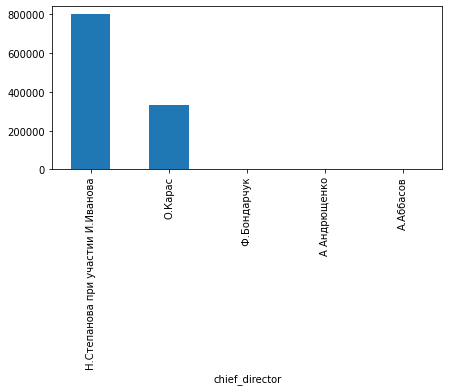

chief_director
Р.Давлетьяров   249,166,767.70
П.Тодоровский   228,578,204.00
 Ф.Бондарчук               NaN
А Андрющенко               NaN
А.Аббасов                  NaN
Name: до 9 звёзд, dtype: float64

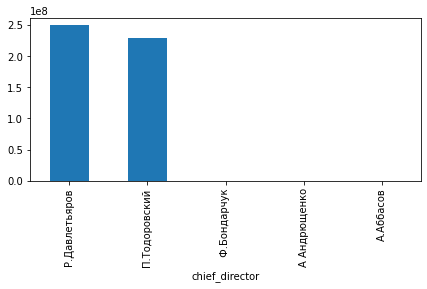

chief_director
Р.Прыгунов     408,646,665.70
П.Худяков          410,058.00
А.Атанесян         365,353.60
А.Попова                 0.00
 Ф.Бондарчук              NaN
Name: до 8.5 звёзд, dtype: float64

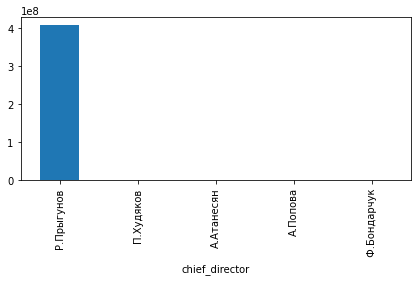

chief_director
А.Мегердичев   2,779,686,144.00
Н.Лебедев      1,402,255,390.00
Д.Киселев        544,332,260.00
А.Учитель        511,775,548.00
С.Мокрицкий      401,804,461.90
Name: до 8 звёзд, dtype: float64

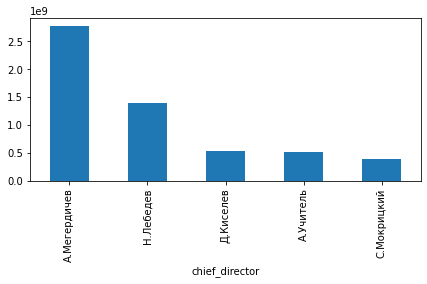

chief_director
К.Шипенко      752,679,777.00
Д.Месхиев      451,812,221.70
А.Войтинский   352,804,320.40
А.Волгин       307,650,644.24
А.Аксененко    168,688,859.10
Name: до 7.5 звёзд, dtype: float64

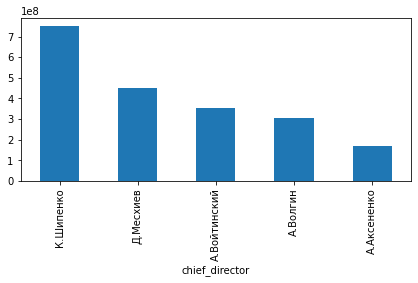

chief_director
К.Шипенко      3,075,092,440.79
А.Сидоров      2,271,754,004.52
В.Дьяченко     1,949,628,438.60
Д.Шмидт        1,205,997,451.00
Д.Козловский     820,528,005.21
Name: до 7 звёзд, dtype: float64

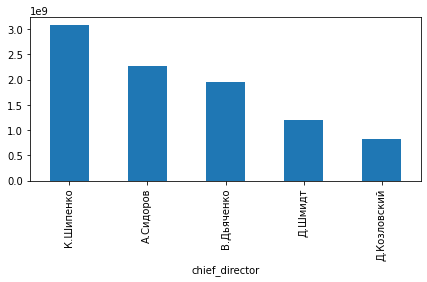

chief_director
Д.Киселев                                855,451,052.00
К.Феоктистов                             759,226,773.00
М.Бальчюнас (псевдоним Марюс Вайсберг)   439,776,371.25
О.Степченко                              333,597,059.59
И.Максимов                               253,575,226.83
Name: до 6 звёзд, dtype: float64

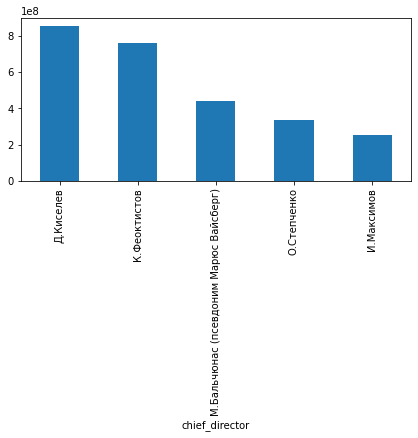

chief_director
О.Трофим                             1,445,731,797.89
А.Першин (псевдоним Ж.Крыжовников)     683,029,061.40
В.Дьяченко                             455,270,195.52
А.Пиманов                              342,898,736.00
Т.Бекмамбетов                          308,401,482.70
Name: до 5 звёзд, dtype: float64

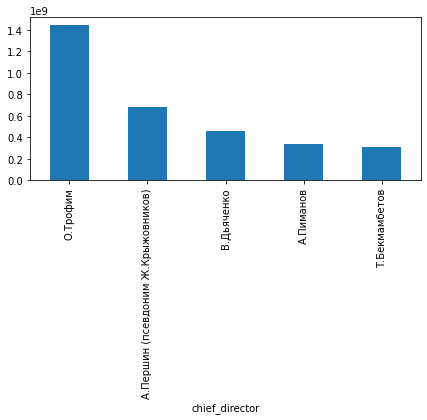

In [109]:
for ratings in reversed(np.transpose(top_directors).index):
    display(top_directors[ratings].sort_values(ascending=False).head())
    top_directors[ratings].sort_values(ascending=False).head().plot(kind='bar', figsize=(7, 3))
    plt.show()

***Хмм.. интересно, самый высокий ретинг, а сборы как-будто с пары кинотеатров...***

***Также, что интересно "суммы сборов" на низких рейтингах, тоже крайне высоки!!! Наверное все-таки реклама и пиар делают своё чёрное дело. Маркетинг - страшная сила!!***

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Ага, а еще бывает, что боты повышают рейтинги правильным фильмам.
</div>


**Посмотрим в абсолюте, у каких режиссёров фильмы собрали больше всего в прокате. Возьмём ТОП-10 режиссёров.**

chief_director
К.Шипенко       3,827,772,217.79
А.Мегердичев    2,779,686,144.00
В.Дьяченко      2,404,898,634.12
А.Сидоров       2,325,203,716.46
О.Трофим        1,445,731,797.89
Д.Шмидт         1,412,475,637.00
Н.Лебедев       1,402,255,390.00
Д.Киселев       1,399,783,312.00
Т.Бекмамбетов   1,009,908,512.97
С.Андреасян       910,430,198.34
Name: box_office, dtype: float64

<AxesSubplot:xlabel='chief_director'>

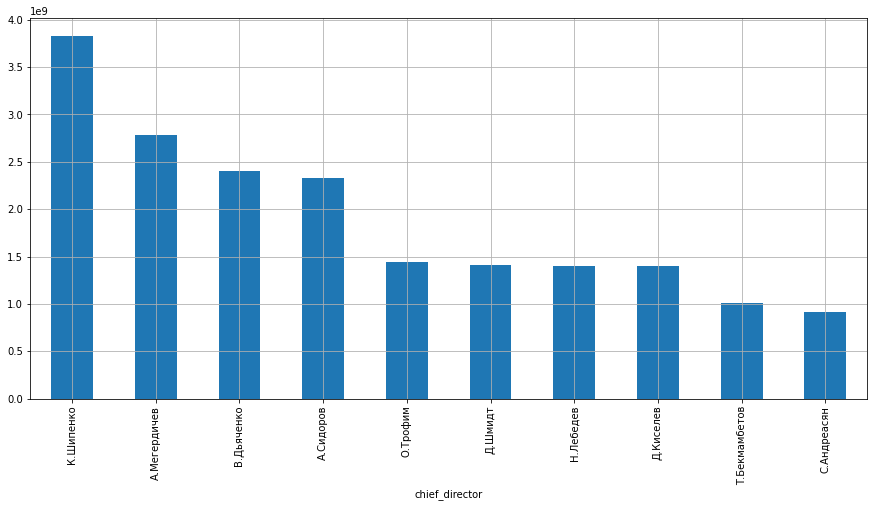

In [117]:
top_directors = state_support.pivot_table(index='chief_director', values='box_office', aggfunc='sum')
display(top_directors['box_office'].sort_values(ascending=False).head(10))
top_directors['box_office'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(15, 7), grid=True)

**Посмотрим какие-же фильмы сделали эти режиссёры.**

In [126]:
for director in top_directors['box_office'].sort_values(ascending=False).head(10).index:
    print('Фильмы режиссёра {0}'.format(director))
    display(state_support.query('chief_director == @director')[['title', 'type', 'age_restriction', 'budget', 'box_office', 'financing_source', 'main_genre', 'group_ratings']])
    print()

Фильмы режиссёра К.Шипенко


,title,type,age_restriction,budget,box_office,financing_source,main_genre,group_ratings
2268,Исповедь Z@drota,Художественный,«18+» - запрещено для детей,"51,196,711.00","1,523,750.00",Министерство культуры,драма,до 7 звёзд
5499,Салют-7,Художественный,«12+» - для детей старше 12 лет,"493,733,957.00","752,679,777.00",Фонд кино,драма,до 7.5 звёзд
7453,Холоп,Художественный,«12+» - для детей старше 12 лет,"160,000,000.00","3,073,568,690.79",Фонд кино,комедия,до 7 звёзд



Фильмы режиссёра А.Мегердичев


,title,type,age_restriction,budget,box_office,financing_source,main_genre,group_ratings
5650,Движение вверх,Художественный,«6+» - для детей старше 6 лет,"590,192,191.00","2,779,686,144.00",Фонд кино,спорт,до 8 звёзд



Фильмы режиссёра В.Дьяченко


,title,type,age_restriction,budget,box_office,financing_source,main_genre,group_ratings
2766,Страна чудес,Художественный,«12+» - для детей старше 12 лет,"105,445,546.00","294,590,750.60",Фонд кино,ужасы,до 7 звёзд
2871,Супербобровы,Художественный,«12+» - для детей старше 12 лет,"150,008,573.00","270,538,437.90",Фонд кино,комедия,до 5 звёзд
5502,Последний богатырь,Художественный,«12+» - для детей старше 12 лет,"352,477,575.00","1,655,037,688.00",Фонд кино,комедия,до 7 звёзд
6317,СУПЕРБОБРОВЫ. НАРОДНЫЕ МСТИТЕЛИ,Художественный,«12+» - для детей старше 12 лет,"172,763,618.00","184,731,757.62",Фонд кино,комедия,до 5 звёзд



Фильмы режиссёра А.Сидоров


,title,type,age_restriction,budget,box_office,financing_source,main_genre,group_ratings
6546,Т-34,Художественный,«12+» - для детей старше 12 лет,"563,784,717.00","2,271,754,004.52",Фонд кино,драма,до 7 звёзд
6624,Рассвет,Художественный,«16+» - для детей старше 16 лет,"56,693,559.00","53,449,711.94",Фонд кино,ужасы,до 7.5 звёзд



Фильмы режиссёра О.Трофим


,title,type,age_restriction,budget,box_office,financing_source,main_genre,group_ratings
5705,Лёд,Художественный,«12+» - для детей старше 12 лет,"148,585,222.00","1,445,731,797.89",Фонд кино,неизвестно,до 5 звёзд



Фильмы режиссёра Д.Шмидт


,title,type,age_restriction,budget,box_office,financing_source,main_genre,group_ratings
3104,Иван Царевич и Серый Волк 3,Анимационный,«6+» - для детей старше 6 лет,"179,257,987.00","704,928,216.00",Фонд кино,мультфильм,до 7 звёзд
3686,Урфин Джюс и его деревянные солдаты,Анимационный,«0+» - для любой зрительской аудитории,"344,905,389.00","206,478,186.00",Фонд кино,мультфильм,до 6 звёзд
7463,Иван Царевич и Серый Волк 4,Анимационный,«6+» - для детей старше 6 лет,"190,000,000.00","501,069,235.00",Фонд кино,мультфильм,до 7 звёзд



Фильмы режиссёра Н.Лебедев


,title,type,age_restriction,budget,box_office,financing_source,main_genre,group_ratings
2919,Экипаж .,Художественный,«6+» - для детей старше 6 лет,"635,283,867.00","1,402,255,390.00",Фонд кино,драма,до 8 звёзд



Фильмы режиссёра Д.Киселев


,title,type,age_restriction,budget,box_office,financing_source,main_genre,group_ratings
3254,Время первых (2017),Художественный,«6+» - для детей старше 6 лет,"528,441,977.00","544,332,260.00",Фонд кино,приключения,до 8 звёзд
5638,Ёлки Новые,Художественный,«6+» - для детей старше 6 лет,"174,381,922.00","855,451,052.00",Фонд кино,комедия,до 6 звёзд



Фильмы режиссёра Т.Бекмамбетов


,title,type,age_restriction,budget,box_office,financing_source,main_genre,group_ratings
3609,Ёлки 5,Художественный,«6+» - для детей старше 6 лет,"215,162,287.00","308,401,482.70",Фонд кино,семейный,до 5 звёзд
6506,Ёлки Последние,Художественный,«6+» - для детей старше 6 лет,"179,708,770.00","701,507,030.27",Фонд кино,комедия,до 7 звёзд



Фильмы режиссёра С.Андреасян


,title,type,age_restriction,budget,box_office,financing_source,main_genre,group_ratings
3461,Защитники,Художественный,«12+» - для детей старше 12 лет,"323,232,109.00","262,040,254.00",Фонд кино,фантастика,до 5 звёзд
3480,Землетрясение .,Художественный,«12+» - для детей старше 12 лет,"206,982,031.00","188,605,593.30",Фонд кино,драма,до 7 звёзд
6175,Непрощенный,Художественный,«16+» - для детей старше 16 лет,"82,496,889.00","393,279,629.43",Министерство культуры,драма,до 7 звёзд
7265,РОБО,Художественный,«6+» - для детей старше 6 лет,"140,025,000.00","66,504,721.61",Министерство культуры,фантастика,до 8 звёзд


***Как видим самые "Топовые" режиссёры сотрудничают чаще с Фондом кино, при этом нет ни одного фильма где Мин. культуры спонсировало бы совместно с Фондом кино.***

***А вообще жаль, что кто-то "похимичил" с данными, интересно было бы посмотреть на полную реальную информацию.***

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента</font></h5>    

Вообще жаль, что времени на сборный проект отведено так мало. Можно было бы конечно еще чего-нибудь посмотреть)). Но вовсе не охота переводится на другой поток...
Уж извиняюсь.
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Логично. В любом случае, все по работе хорошо.
</div>


### Шаг 5. Напишите общий вывод

**В ходе данного проекта был проведён ряд работ связанных с подготовкой данных, их предобработкой, добавлены необходимые столбцы, а также были проведены исследования с подготовленными данными.**

**1) Подготовка данных.**
* На данном этапе были открыты файлы: mkrf_movies.csv и mkrf_shows.csv. По результатам изучения было принято о решение об объединении данных файлов в один. Для этого, был приведён к целочисленному виду столбец puNumber, по которому и было сделано объединение.

**2) Предобработка данных.**
* **Изменение типов данных.**
    * В начале столбец _show_start_date_ был приведён к формату дата/время.
    * Значения в столбце _ratings_ были приведены к вещественному типу данных.
* **Изучение и устранение пропусков в данных.**
    * Выявлены столбцы где присутствуют пропущенные значения, подсчитаны доли пропусков от общего числа значений.
    * Пропуски значений в колонке "рейтинг" были заменены на "0".
    * На основании подсчитанных долей процентов было определено, что столбцы "объём возвратных средств", " объём невозвратных средств", "источники финансирования" и "бюджет" имеют одинаковый процент потерь, и более того по информации представленной в "источниках финансирования", был сделан вывод о том, что указанные колонки содержат данные касательно фильмов, созданных с помощью гос. поддержки. Для дальнешей работы в числовых значениях пропуски заменили на "0", а в "источники финансирования" - "иной источник".
    * Выявленные пропуски в столбцах "студия производства", "режиссёр", "продюсер" и "жанр" пропуски заменили строкой "неизвестно".
* **Поиск неявных дубликатов в данных. Данный блок предобработки получился самым обширным.**
    * Изучая категориальные данные было определено, что в данных столбцах информация хранится в строках с перечислением множества данных через специальные символы, кроме колонок: "возрастные ограничения" и "типы фильмов" (в "типах фильмов" былы просто устранены лишние пробелы). Хранение данных в подобном виде усложняет их обработку, а следовательно и поиск неявных дубликатов. Для решения данной проблемы были созданны следующие функции: 
        * функция, формирующая массив с уникальными названиями (по заданному столбцу из фрейма и разделительному знаку);
        * функция для оценки "похожести" заданных строк (не смотря на низкую устойчивость, удалось избавится от большего числа неявных дубликатов);
        * функция, формирующая "словарь", где ключём является эталонное название, а в списке значений хранятся названия, которые надо заменить на эталонное (ключ);
        * также был создан ряд вспомогательных функций.
     * Применив созданные функции, были устранены неявные дубликаты в столбцах: "студия производства", "режиссёры" и "продюсеры". При этом, из-за особенностей колонки "студии производства" был создан дополнительный столбец из названий написанных нижним регистром.
     * Колонка "страна производства" является самой сложной с точки зрения "разделителей", так как их много и они от строки к строке отличаются, из-за этого для данного столбца был придуман новый алгоритм для устранения дубликатов. В результате здесь также были устранены неявные дубликаты.
     * Проверив, колонку "жанры" - дубликатов не было отмечено.
     * Анализируя столбцы "бюджет", "объём возвратных средств", "объём невозвратных средств" и "источник финансирования" (budget, refundable_support, nonrefundable_support и financing_source), была отмечена важная особенность, что данные о бюджете фильмов есть только для фильмов созданных при гос. поддержке. Исходя из этого, имеем определённую проблему, при дальнейшем исследовании "бюджетов" фильмов, мы будем изучать только узкий круг фильмов.
     * Для проведения дальнейших работ, были добавлены столбцы содержащие информацию:
         * главный режиссёр;
         * главный жанр;
         * доля гос. поддержки относительно бюджета.
         
**3) Исследовательский анализ данных.**
* **Исследование количества фильмов выпущенных в период с 2014 по 2019 года.**
    * Для начала была произведена группировка данных по года выпуска фильмов методом _pivot_table_;
    * В таблице содержится информация:
        * об общем количестве выпущенных фильмов;
        * о количестве фильмов вышедших в прокат;
        * доля прокатных фильмов от общего числа.
    * По сгруппированным данным построены диаграммы, и получены следующие выводы: 
        * число фильмов вышедших в прокат рoсло от года к году (кроме 2017 года);
        * явно прослеживается тренд на увеличение числа прокатных фильмов;
        * растёт доля фильмов, вышедших в прокат;
        * стоит отметить, в 2017 году количество фильмов в прокате существенно "просело" в сравнении с другими годами, однако доля этих фильмов относительно всех фильмов достигла своего пика и превысила 70% ! Также, в 2017 году было было представлено меньше всего фильмов.
    * В таблицу были добавленны данные по суммам сборов для изучения их динамики по годам и построена диграмма, по результатам получены выводы:
        * до 2014 года суммы сборов были крайне низкими, затем начался бурный рост до 2016 года, и далее сборы стали стабильно одинаковыми (что связано с малым количеством информации о прокате до 2014 года включительно);
        * минимальная сумма сборов фильмов, вышедших в прокат, была в 2010 году и составляет 2.4 млн. руб.;
        * максимальная сумма сборов была в 2018 году - 49668.4 млн. руб.
    * Кроме того, в сводную таблицу были добавлены средние и медианные суммы сборов, а также построены диаграммы и получены выводы:
        * средние значения получились значительно больше медианных, что может говорить о наличии в данных множества аномально больших значений, которые приводят к такому результату;
        * из этого делаем вывод, что при оценке усредненных значений по сумме сборов, лучше всего использовать медиану, так как она лучше подойдёт для будущих оценок и возможного прогнозирования будущих сборов.
* **Исследование влияния "возрастных ограничений" на сборы в прокате.**
    * Для этого, также методом _pivot_table_ были проведены группировки данных и построены диаграммы по ним. По результатам получены следующие выводы:
        * в 2010 и 2011 самые большие сборы в прокате собирали фильмы категории "0+", имея абсолютное доминирование в прокате;
        * в 2012 году "собрали кассу" фильмы категорий "16+" и "6+", которые в дальнейшем только росли из года в год;
        * важно, что почти все категории (кроме "0+") имеют восходящий тренд роста сборов; 
        * В целом, можно с уверенностью сказать, что фильмы категории "16+" начиная с 2012 года стали собирать самые большие суммы в прокате;
        * судя по диаграммам, 2014 год стал поворотным с точки зрения проката фильмов, т.к. именно в этот год произошёл значительный рост сборов фильмов.
     * Для оценки истинности утверждения "фильмы категории "16+" - самые выгодные", было проведено дополнительное исследование в рамках которого было вычислено, сколько в среднем собирает фильм из заданных категорий. Были созданы новые сводные таблицы и построены диаграммы. По итогам исследования получены выводы:
         * рост сборов фильмов в превую очередь связан с выпускаемым количеством этих фильмов
         * суммы сборов фильмов категории "0+" стали падать именно из-за того, что самих фильмов стало существенно меньше. В то время как во всех остальных категориях наблюдается рост числа фильмов.
         * фильмы категории "16+" в сумме приносит больше всего денег, но в пересчёте на один фильм являются уверенными "средниками" и в общей массе не часто выстреливают;
         * при этом фильмы категорий "18+" и "6+" наоборот, с 2014 взяли курс на рост и стали реальными лидерами. Получается, что в контексте сборов именно для создателей фильмов данные категории являются самыми результативными и приносят больше всего денег.
         
**4) Исследование фильмов, которые получили государственную поддержку**
* **Изучение выделений средств на производство фильмов относительно источников финансирования, а также сборов этих фильмов.**
    * Для подготовки к данному исследованию была создана сводная таблица, содержащая информацию о сумме "сборов в прокате", "возвратных средств", "не возвратных средств", а также их медианные значения. На основании данной таблицы были построены диаграммы и получены следующие выводы:        
        * чаще всех поддержку оказывает Фонд кино;
        * общие сборы у фильмов с поддержкой Фонда кино самые высокие;
        * общая сумма бюджетов фильмов созданных при поддержке Министерства культуры значительно превосходит сборы этих фильмов;
        * Министерство культуры и Фонд кино редко совместно финансируют фильмы;
        * в среднем, количество вложеных средств гос. поддержки не окупается (если вообще окупается);
        * фильмы созданные при поддержке Фонда кино имеют самые большие сборы и бюджеты;
        * фильмы в финансировании, которых принимало участие Министерство культуры в крайней степени убыточные (средний бюжет таких фильмов более чем в 4 раза больше средних сборов);
        * исходя их вышесказанного, было сделано оценочное суждение: "Министерство культуры выделяет деньги на благотворительной основе, в то время как Фонд кино, требует возврата части выделенных средств".
* **Изучение влияния рейтинга фильмов с гос. поддержкой на сборы в прокате относительно источников финансирования.**
    * В рамках подготовки к данному исследованию, в созданном срезе данных, был добавлен столбец с группами рейтингов. На основании данных групп, была собрана сводная таблица, которая содержит информацию о медианных значениях рейтингов по кассовым сборам и бюджетам фильмов. По данным из этой таблицы были построены диаграммы и получены следующие выводы:
        * самые большие сборы получили фильмы с высоким рейтингом свыше 6 звёзд;
        * фильмы Фонда Кино даже с самым низким рейтингом в среднем собирают столько же сколько и самые кассовые фильмы с поддержкой Министерства культуры;
        * самыми кассовыми фильмами Фонда кино становятся фильмы с рейтингом выше 7.5 звёзд;
        * самые рейтинговые фильмы в среднем собирают свыше 50 млн., в случае с Фондом кино более 100 млн.;
        * бюджеты фильмов Министерства культуры в среднем самые низкие, и напротив у Фонда кино - самые высокие;
        * самые рейтинговые фильмы больше 6 звёзд имеют бюджеты свыше 100 млн.;
        * фильмы Фонда кино с рейтингом от 8 до 8.5 звёзд в действительности оккупаются и приносят существенный доход;
        * фильмы имеющие самый высокий рейтинг "больше 9 звёзд" преимущественно находятся среди фильмов Минестерства культуры. 
    * В целом, по результатам данного исследования выявлен ряд интересных закономерностей:
        * фильмы снятые с гос. поддержкой как правило не окупаются и бюджет фильма зачастую значительно превосходит сборы в прокате;
        * только Фонд кино требует возврата части вложенных бюджетных средств;
        * большая часть фильмов делается именно при поддержке Фонда кино.
        * Также, стоит отметить один немаловажный факт, что фильмы при производстве которых участвовали средства Министерства культуры имеют самую низкую окупаемость из предложенных в данном проекте. Не исключено, что это связано с тем, что отсутствие необходимости вернуть часть вложенных средств обратно в бюджет, приводит к столь низким кассовым сборам (возможно здесь комплекс различных факторов, которые выходят за рамки данного проекта).

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Спасибо за дополнение. Оценка по господдержке хорошая и взвешенная. Я думаю, Минкульт как-то фокусируется на госполитике, продвижении ценностей, Фонд кино ближе про бизнес. Поэтому если уж делаем аналитику эффективности господдержки, то улучшить бизнесовые метрики нужно Фонду кино. 
</div>


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Отличный вывод. Можно раскидать его части по промежуточным выводам в предобработку и третью часть.
    
Здесь все описано максимально корректно, но я бы еще добавил отдельным пунктом рекомендации к государству - где можно улучшить господдержку кино. Пожелание как в комсомольском лозунге: «критикуешь - предлагай!».
       
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Мне было интересно следить за ходом мыслей и твоими решениями. Видны очень основательная работа и интерес к проекту. Есть несколько важных моментов, которые необходимо улучшить. Их ты найдешь в разноцветных комментариях.
    
**Отмечу положительные моменты проекта🚀**
    
* Инициативная четвертая часть исследования.
* Достаточно подробная работа и аргументация по шагам.
* Интересные решения в коде.
* хорошее оформление графиков.
    
**На что стоит обратить внимание🤔**
    
* Оформление: нужно добавить описание проекта, промежуточные выводы.
* Предобработка: не следует занулять бюджет и рейтинги, либо используем заглушку вне вероятных значений, либо оставляем пропуски (с этим проблем нет, у нас нет рукописных моделей ML, чтобы пропуски были проблемой).
* Нужно все-таки исследовать аномалии в количественных признаках. Посмотреть соотношение бюджета и госфинансирования.
* В нескольких местах рекомендую поменять тип графиков или отобразить всю информацию на одном. Технически это даже проще, а по восприятию − гораздо более выигрышно будет смотреться (на мой взгляд. Иногда, нет, нужно посмотреть )).
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>



<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 
    
Посмотри по графику по возрастному рейтингу. Там проще было транспонировать таблицу и вывести все линейным графиком, буквально одна строка из чуть-чуть букв.
    
По проекту - думаю, на будущее, все-таки, не стоит увлекаться экспериментами, если дедлайны будут подгорать. Достигать резульатата с помощью минимума усилий − важная история, позволяющая не перегореть на учебе и в работе.

Желаю удачи в дальнейшей учебе!

</div>

- [x]  открыты и изучены файлы
- [x]  объеденины в один фрейм
- [x]  выведены первые строки фрейма, использован метод `info()`
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях студий и стран, в именах режиссёров и продюсеров, типах фильмов
- [x]  добавлено в таблицу: год производства фильма
- [x]  определено и добавлено в таблицу: имя главного режиссёра фильма
- [x]  определено и добавлено в таблицу: название главного жанра фильма
- [x]  посчитано и добавлено в таблицу: доля гос. поддержки относительно бюджета фильма
- [x]  проведено исследование: о количестве выпускаемых фильмов каждый год 
- [x]  проведено исследование: об изменении динамики проката фильмов по годам
- [x]  проведено исследование: о влиянии возрастного ограничения аудитории на сборы фильма в прокате за указанный период
- [x]  проведено исследование: об особенностях связанных с фильмами, которые создавали с гос. поддержкой
- [x]  написаны общие выводы по проекту